<a href="https://colab.research.google.com/github/jeevitha16ds/jeevitha16ds/blob/main/House__price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import basic libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **read file**

In [ ]:
data=pd.read_csv("house_price_predictions.csv")
data.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
data.shape

(1460, 81)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

**Checking missing values**

In [ ]:
missing=data.isnull().sum().sort_values(ascending=False)
missing[missing>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [ ]:
data.drop(["Id","PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)

In [ ]:
data.shape

(1460, 75)

In [ ]:
cat=data.select_dtypes(include="object")
cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
for x in cat.columns:
  print(x)
  print("unique values are")
  print(data[x].unique())
  print("no of unique values",data[x].nunique())
  print("value counts")
  print(data[x].value_counts())
  print()

MSZoning
unique values are
['RL' 'RM' 'C (all)' 'FV' 'RH']
no of unique values 5
value counts
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
unique values are
['Pave' 'Grvl']
no of unique values 2
value counts
Pave    1454
Grvl       6
Name: Street, dtype: int64

LotShape
unique values are
['Reg' 'IR1' 'IR2' 'IR3']
no of unique values 4
value counts
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
unique values are
['Lvl' 'Bnk' 'Low' 'HLS']
no of unique values 4
value counts
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
unique values are
['AllPub' 'NoSeWa']
no of unique values 2
value counts
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
unique values are
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
no of unique values 5
value counts
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Nam

In [ ]:
for x in num.columns:
  print(x)
  print("unique values are")
  print(data[x].unique())
  print("no of unique values",data[x].nunique())
  print("value counts")
  print(data[x].value_counts())
  print()

MSSubClass
unique values are
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
no of unique values 15
value counts
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

LotFrontage
unique values are
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
no of unique values 110
value counts
60.0     143
70.0      70
80.0      69
50.0  

In [ ]:
missing=cat.isnull().sum()
missing[missing>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [ ]:
missing=num.isnull().sum()
missing[missing>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

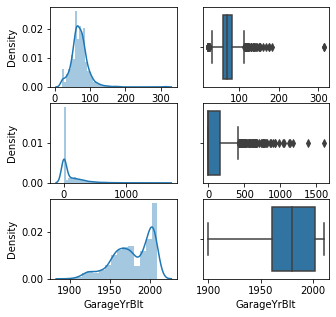

In [ ]:
list1=["LotFrontage","MasVnrArea","GarageYrBlt"]
L=[3,2,1]
a,b,c=L
fig=plt.figure(figsize=(5,5))

for x in list1:
  plt.subplot(a,b,c)
  sns.distplot(data[x])
  c=c+1
  plt.subplot(a,b,c)
  sns.boxplot(data[x])
  c=c+1



In [ ]:
for x in list1:
  data[x]=data[x].fillna(data[x].median())

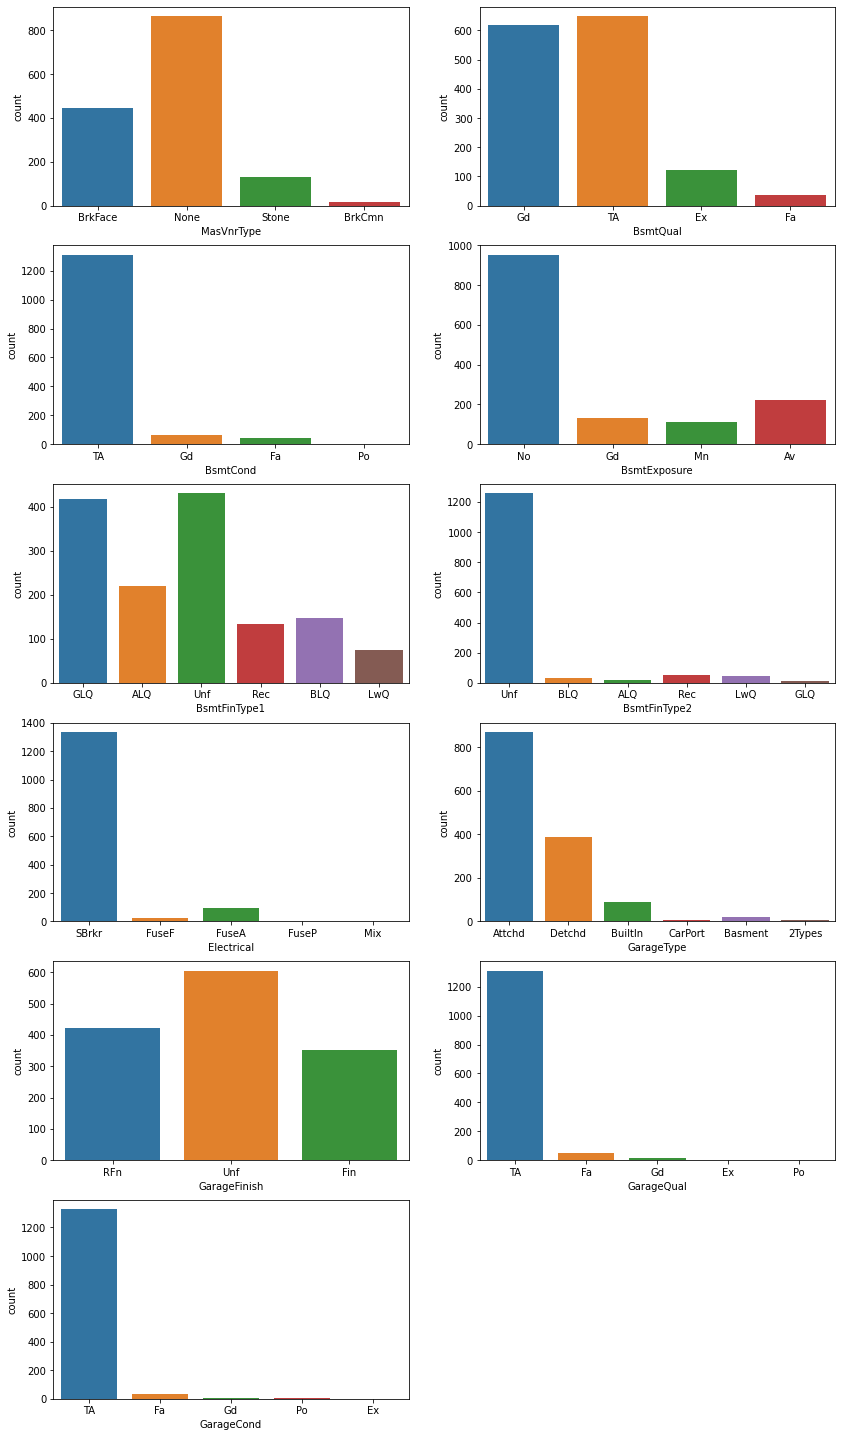

In [ ]:
list2=["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","GarageType","GarageFinish","GarageQual","GarageCond"]     
L=[7,2,1]
a,b,c=L
fig=plt.figure(figsize=(14,30))

for x in list2:
  plt.subplot(a,b,c)
  sns.countplot(data[x])
  
  c=c+1
 

In [ ]:
for x in list2:
  data[x]=data[x].fillna(data[x].mode()[0])

In [ ]:
m=data.isnull().sum()
m[m>0]

Series([], dtype: int64)

# **Exploratory data Analysis**

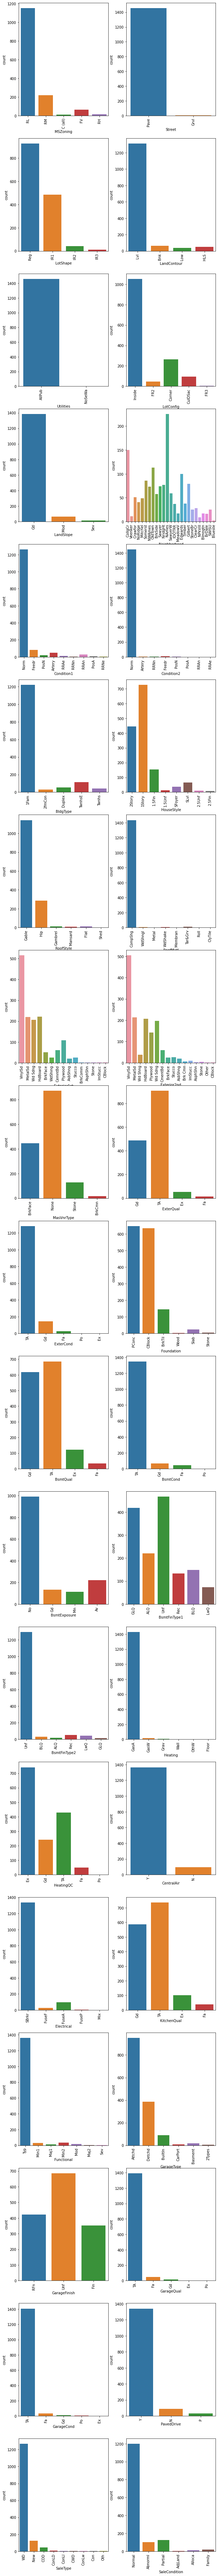

In [ ]:
cat=data.select_dtypes(include="object")
L=[20,2,1]
a,b,c=L
fig=plt.figure(figsize=(10,140))
for x in cat:
  plt.subplot(a,b,c)
  sns.countplot(data[x])
  x=plt.xticks(rotation=90)
  
  c=c+1


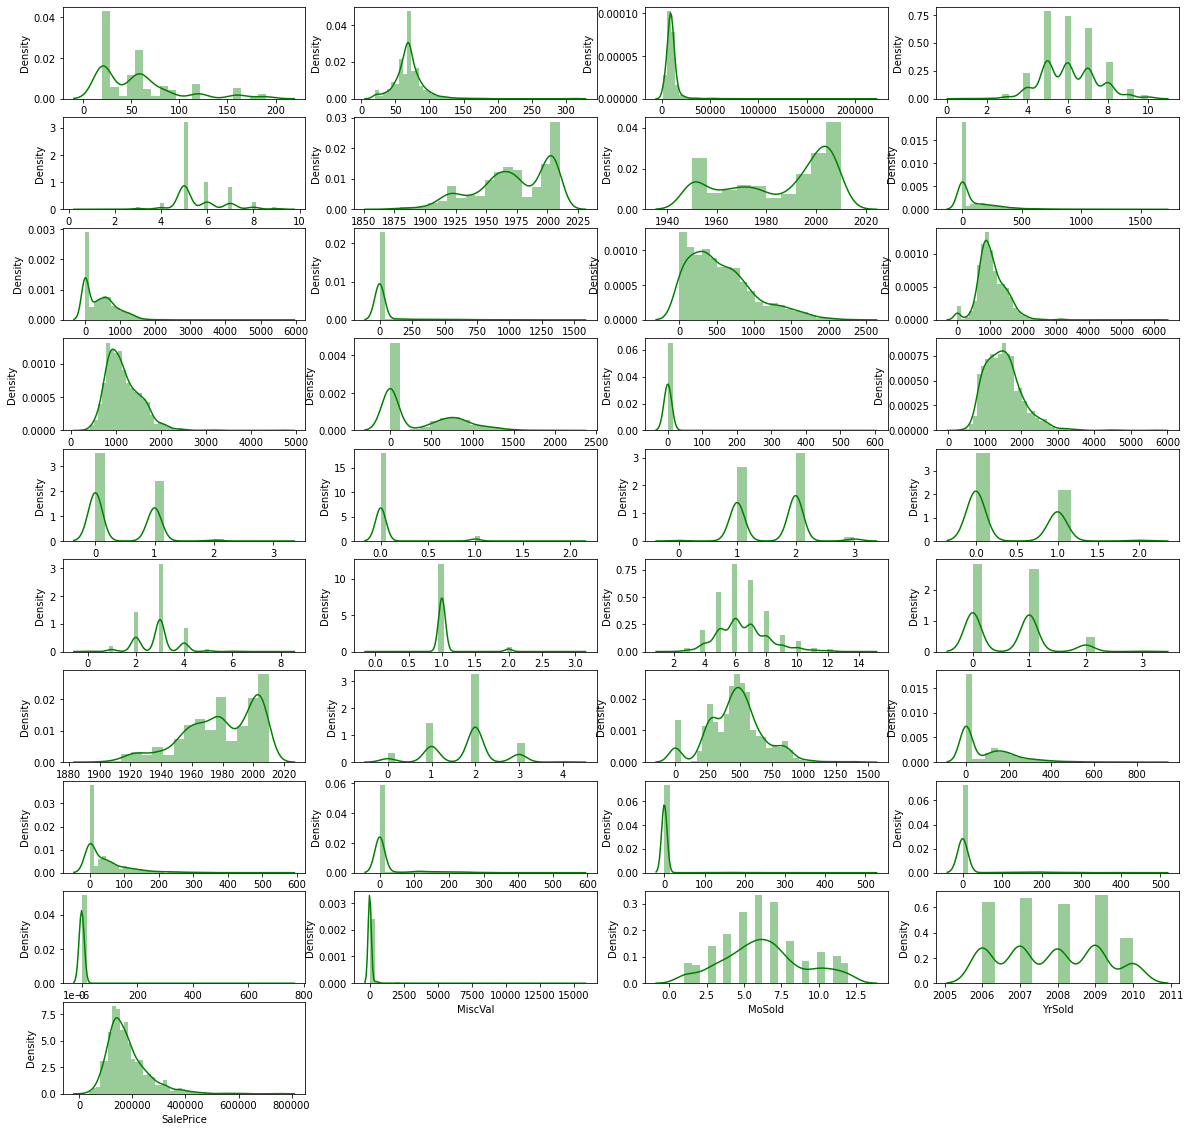

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
L=[10,4,1]
a,b,c=L
fig=plt.figure(figsize=(20,20))
for x in num:
  plt.subplot(a,b,c)
  sns.distplot(data[x],color="green")
  
  c=c+1

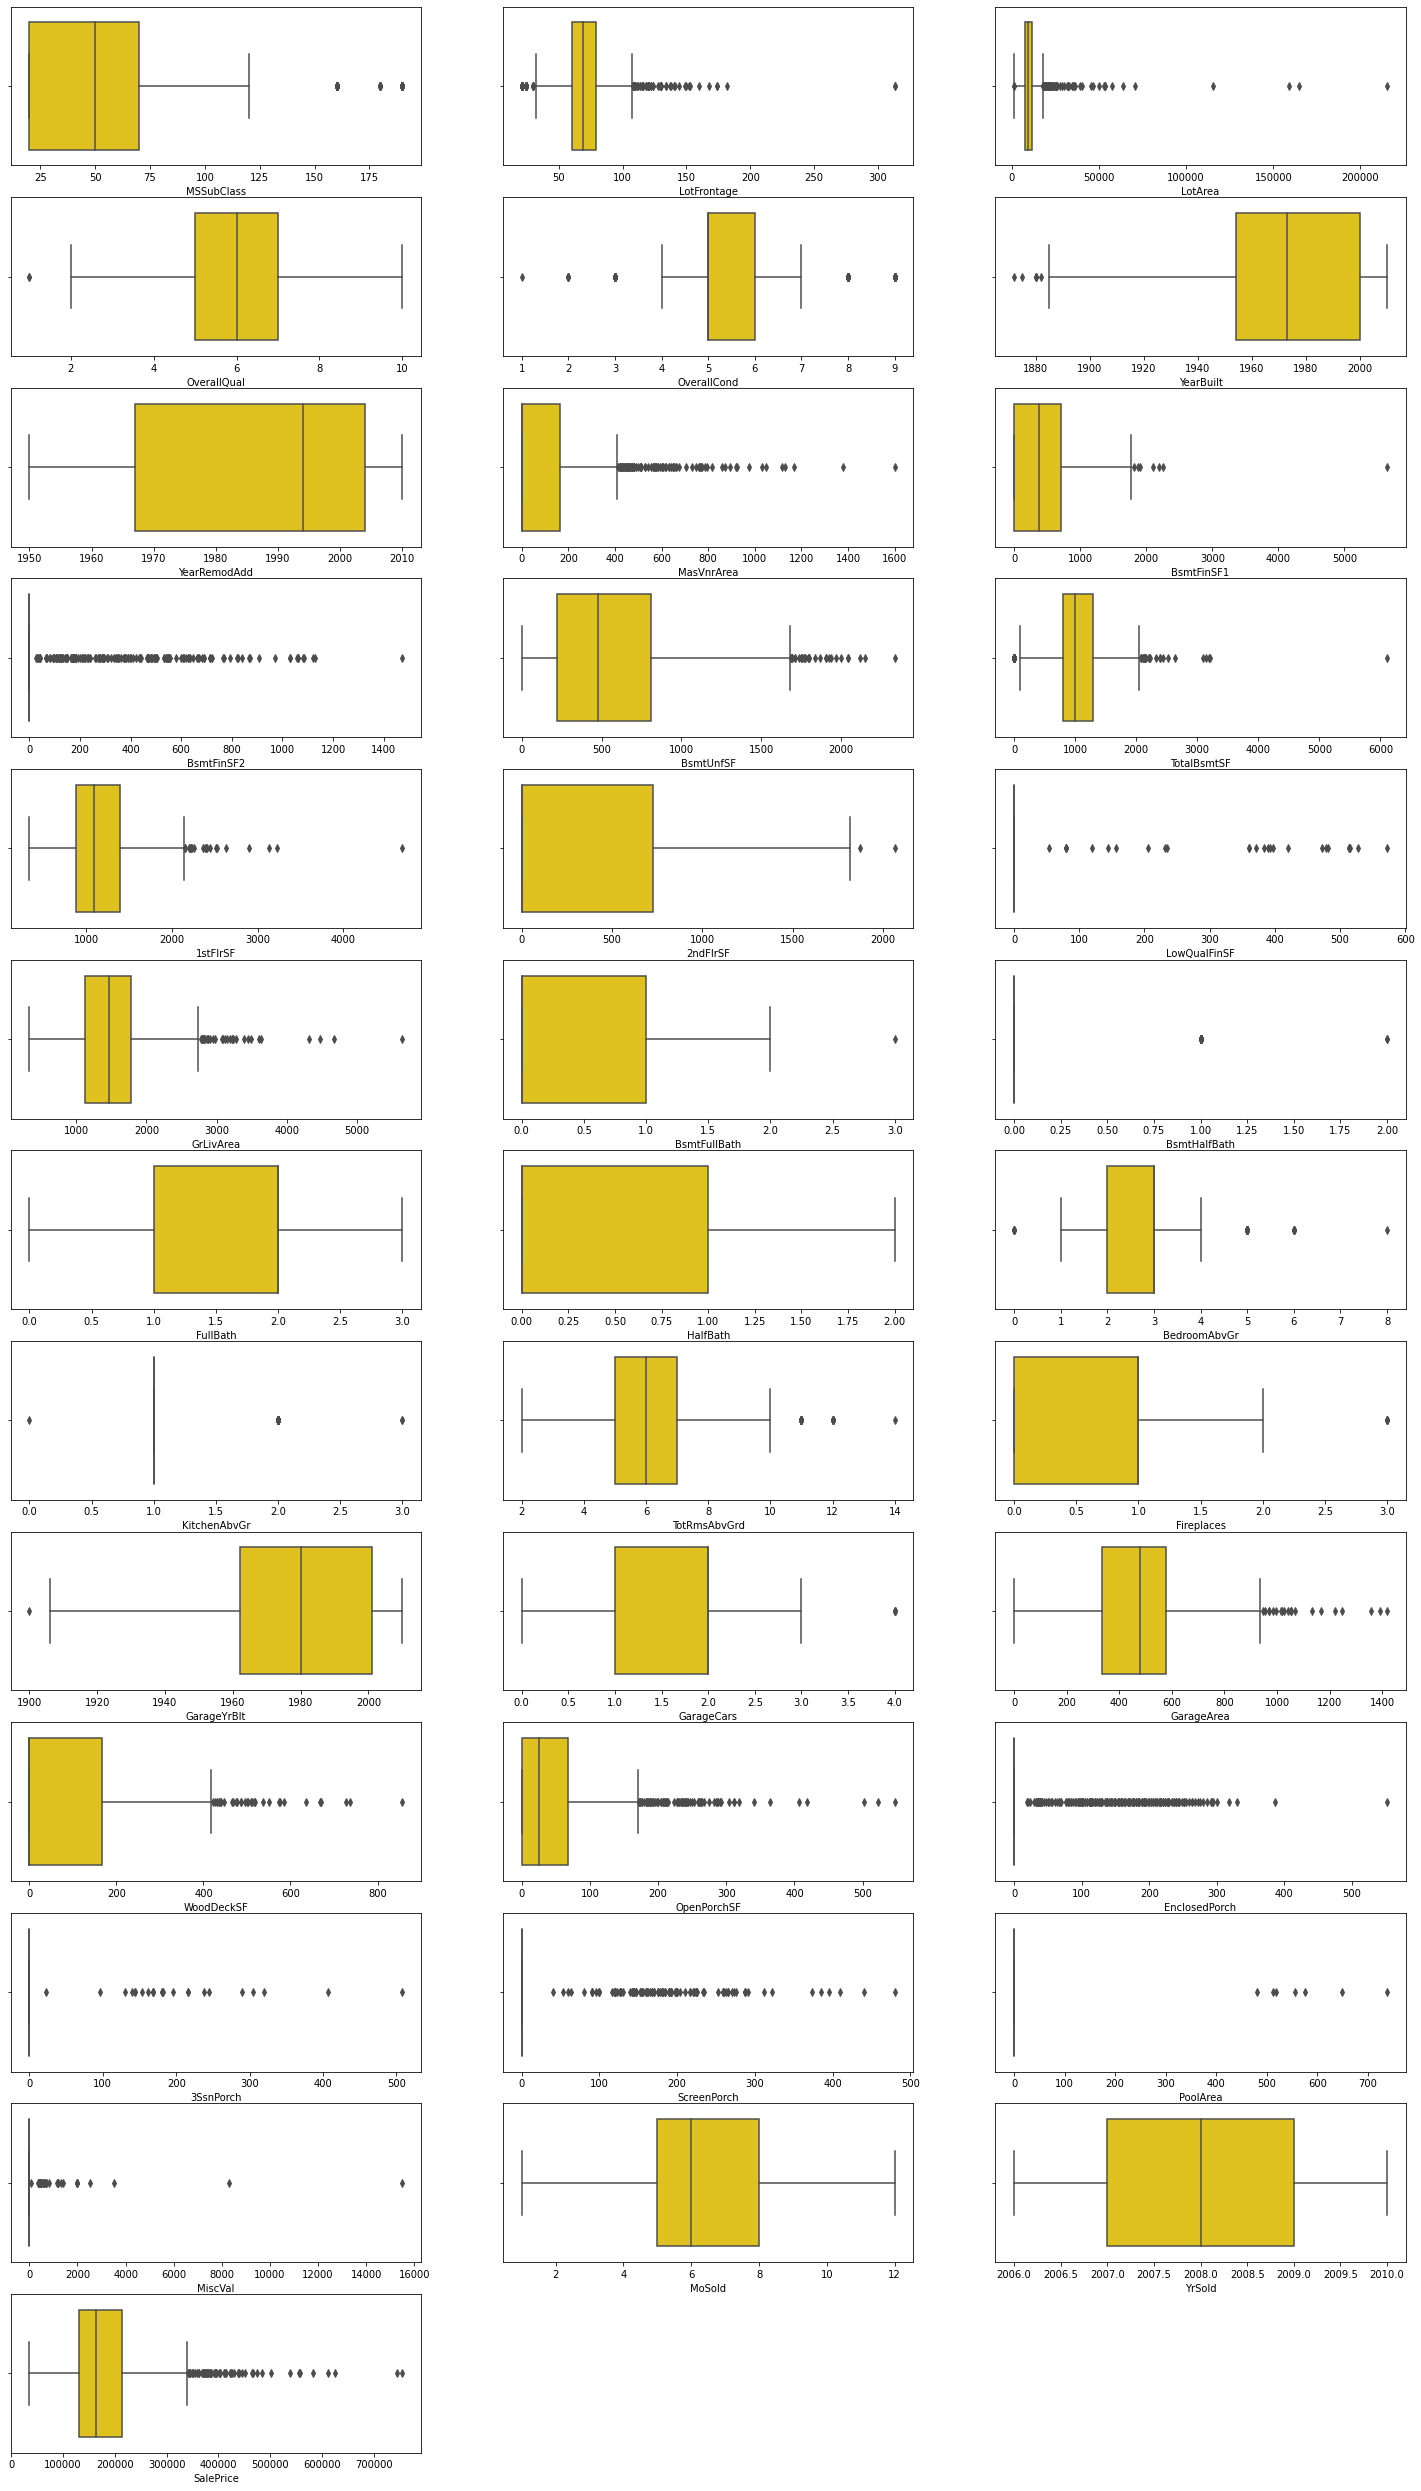

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
L=[13,3,1]
a,b,c=L
fig=plt.figure(figsize=(25,45))
for x in num:
  plt.subplot(a,b,c)
  sns.boxplot(data[x],color="gold")
  
  c=c+1

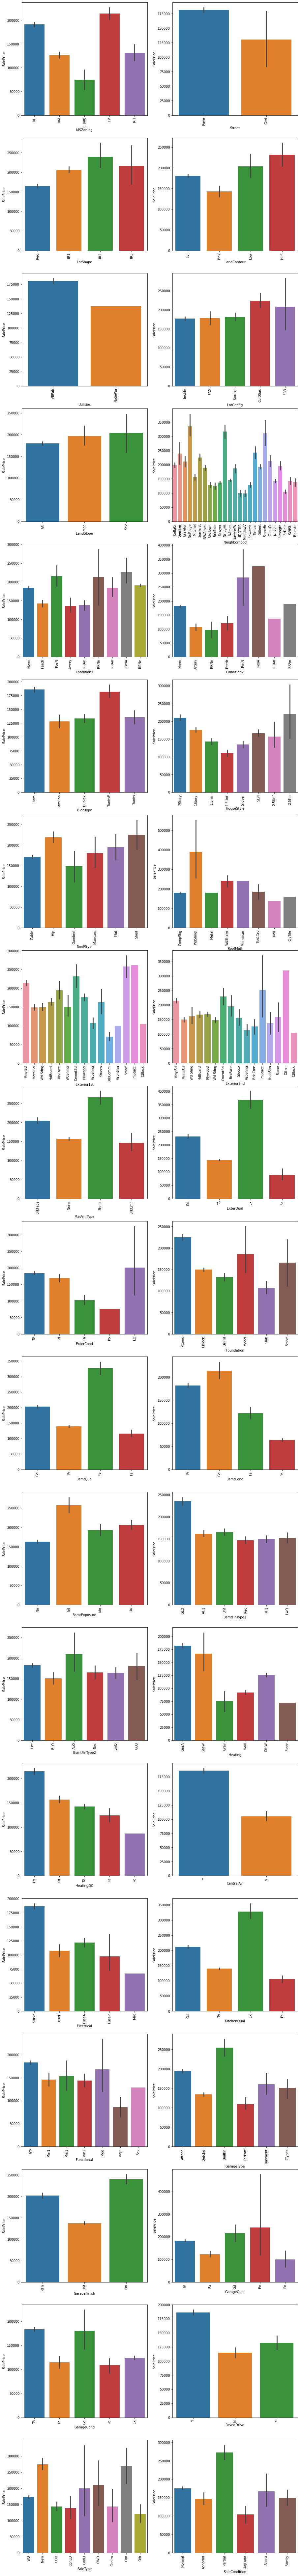

In [ ]:
cat=data.select_dtypes(include="object")
L=[20,2,1]
a,b,c=L
fig=plt.figure(figsize=(15,150))
for x in cat:
  plt.subplot(a,b,c)
  sns.barplot(data[x],data["SalePrice"])
  x=plt.xticks(rotation=90)
 
  
  c=c+1

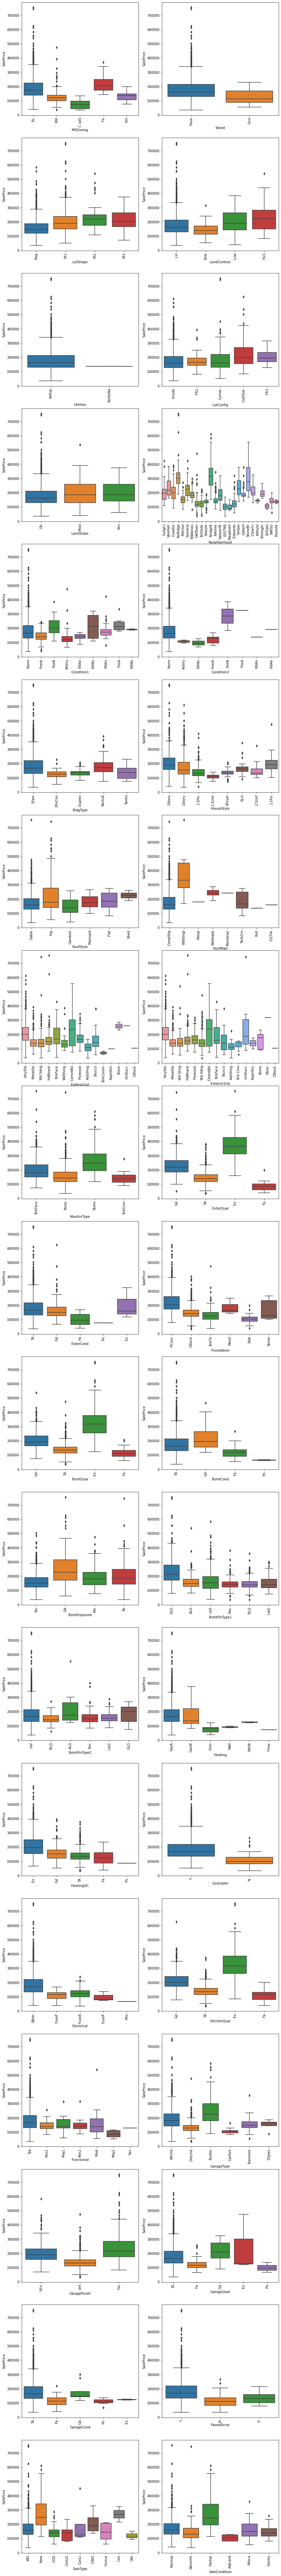

In [ ]:
cat=data.select_dtypes(include="object")
L=[20,2,1]
a,b,c=L
fig=plt.figure(figsize=(14,150))

for x in cat:
  plt.subplot(a,b,c)
  sns.boxplot(data[x],data["SalePrice"])
  x=plt.xticks(rotation=90)
  c=c+1

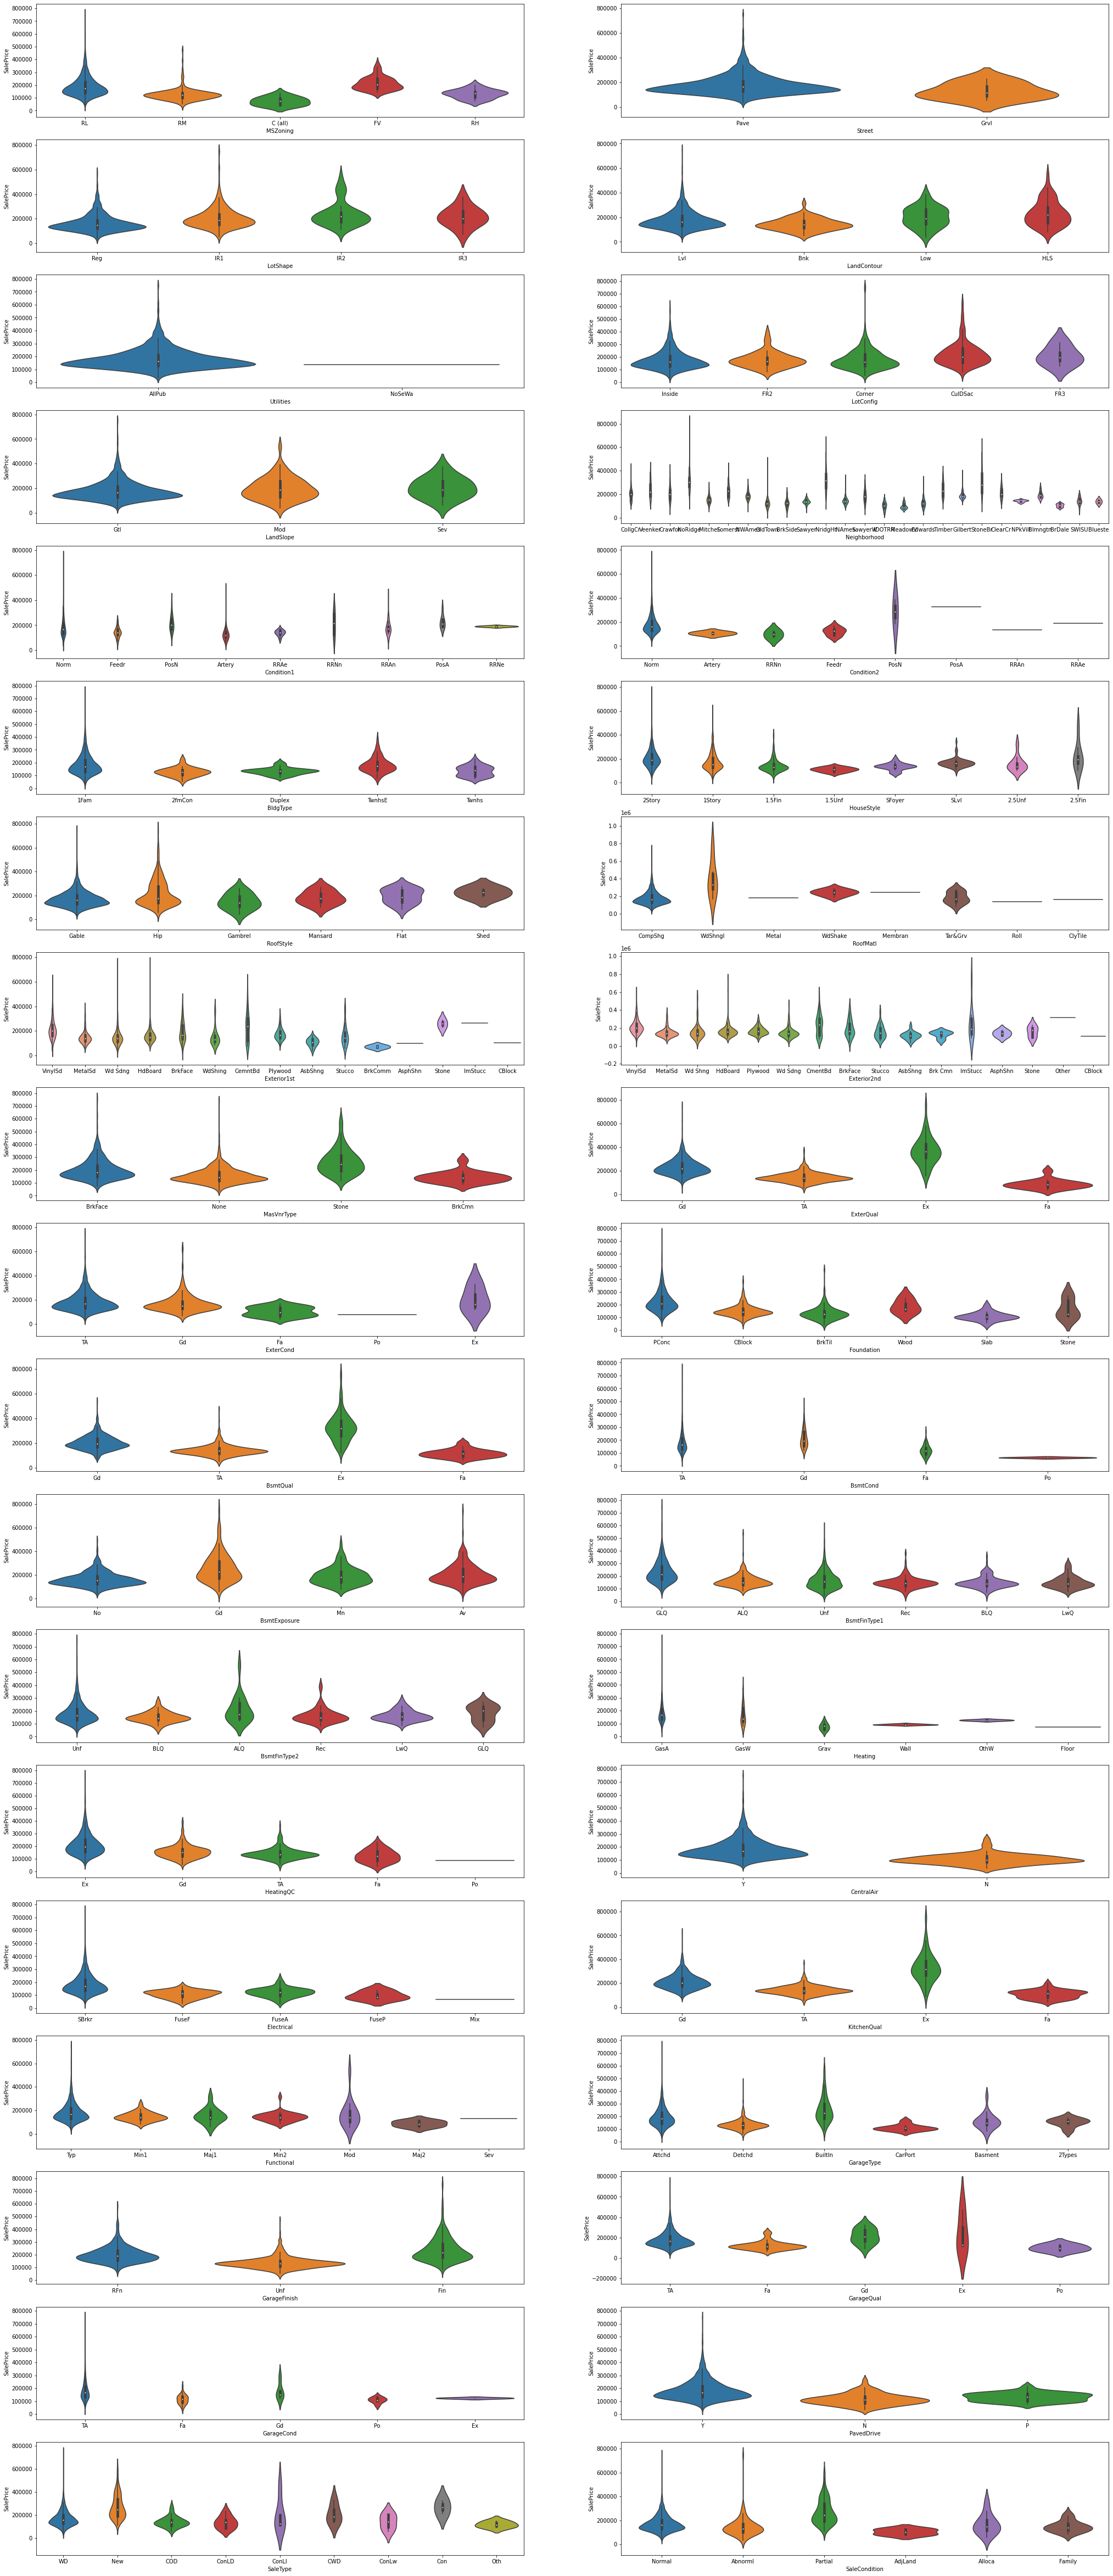

In [ ]:
cat=data.select_dtypes(include="object")
L=[20,2,1]
a,b,c=L
fig=plt.figure(figsize=(35,90))
for x in cat:
  plt.subplot(a,b,c)
  sns.violinplot(data[x],data["SalePrice"])
  
  c=c+1

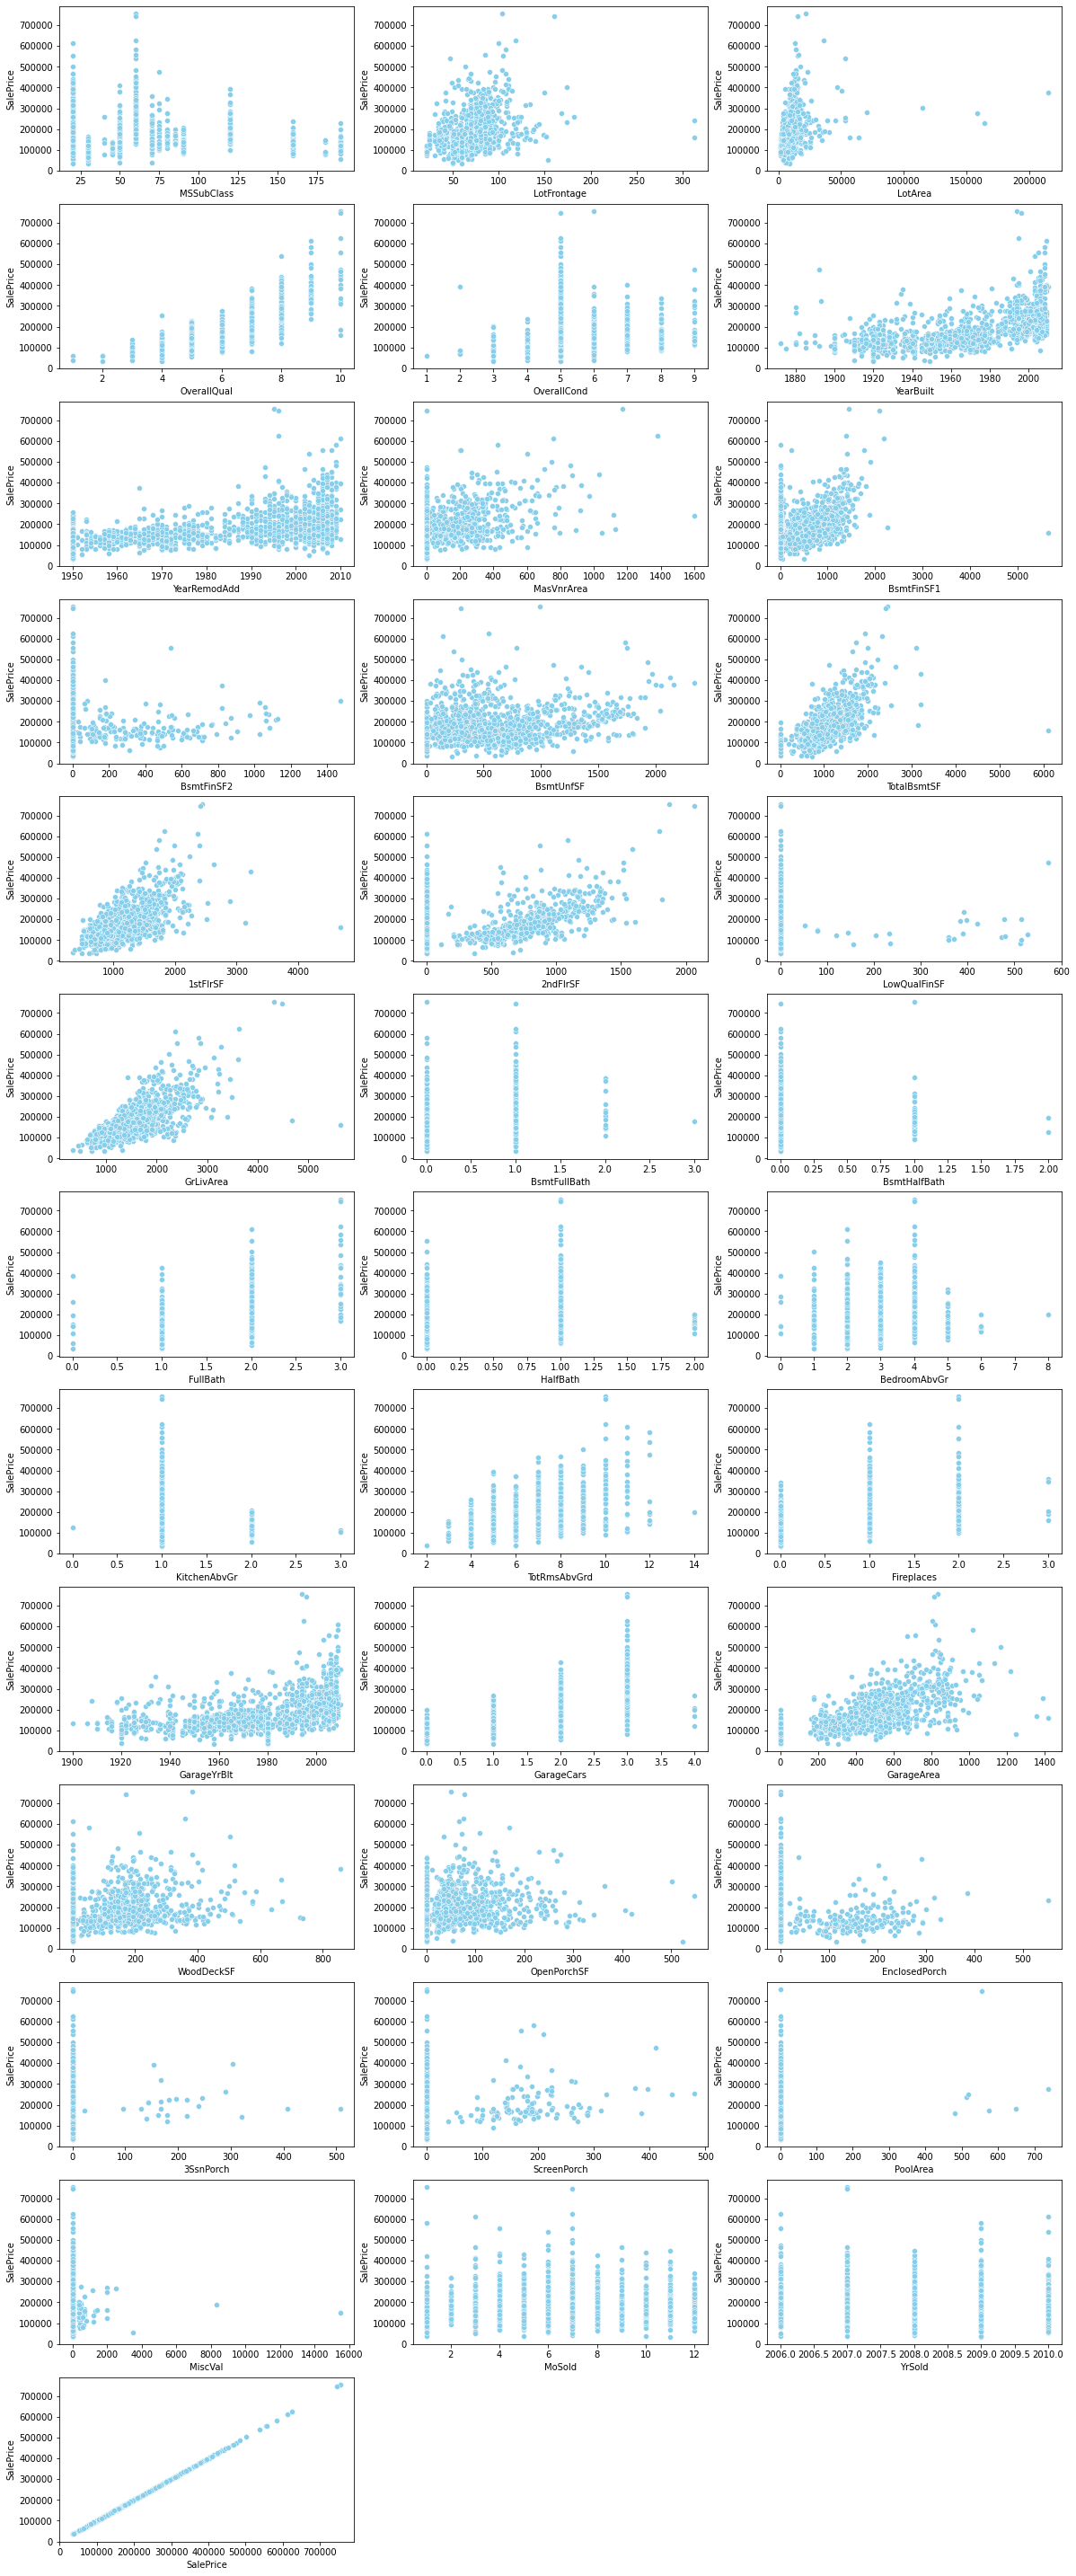

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
L=[15,3,1]
a,b,c=L
fig=plt.figure(figsize=(20,60))
for x in num:
  plt.subplot(a,b,c)
  sns.scatterplot(data[x],data['SalePrice'],color="skyblue")
  
  c=c+1

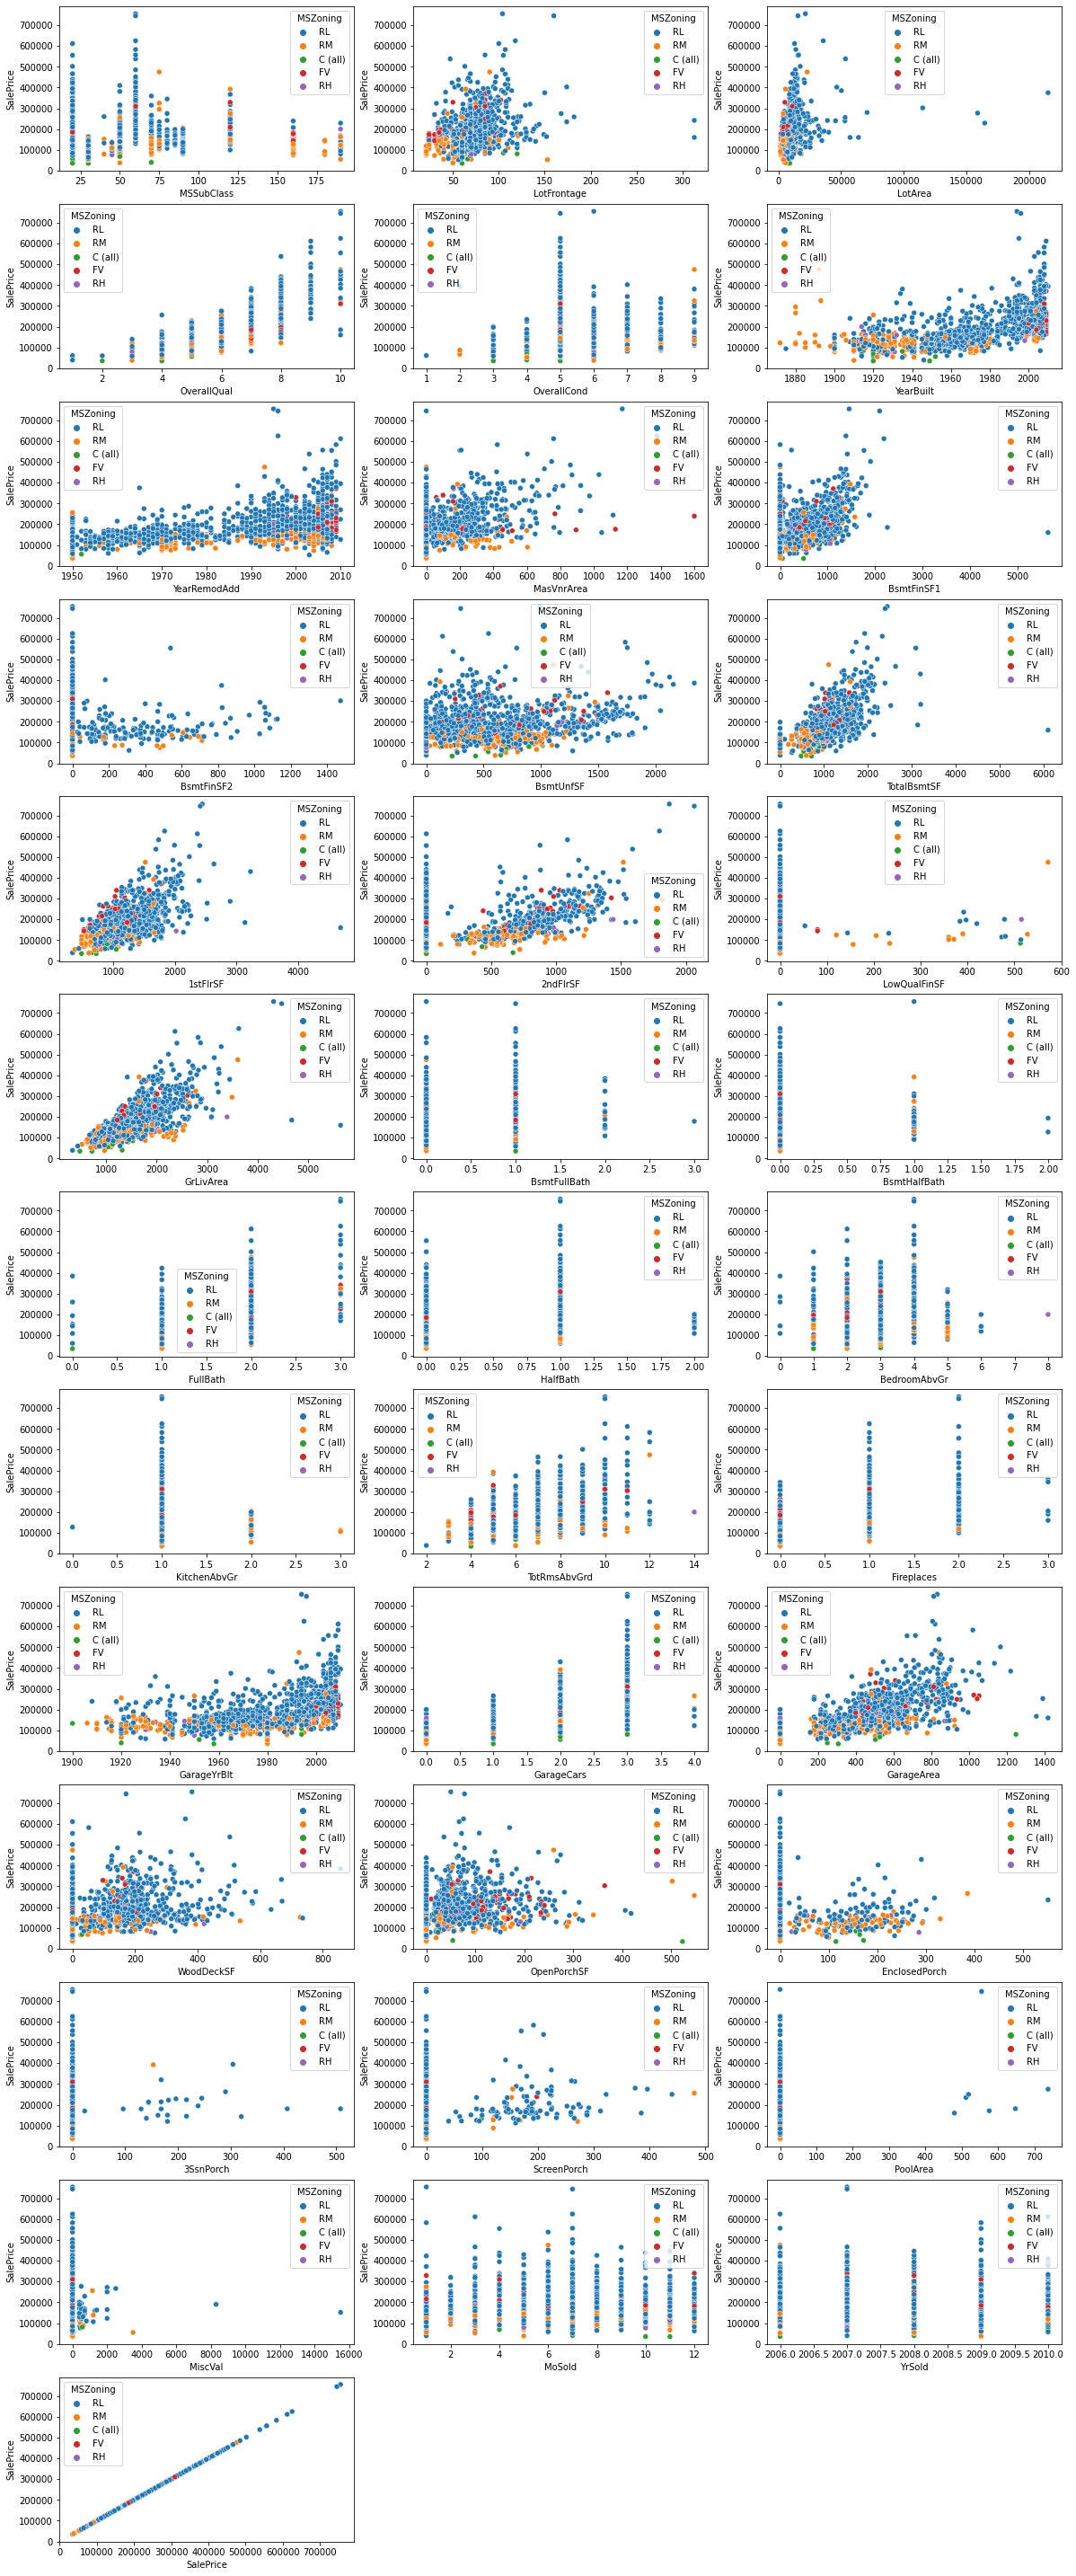

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
L=[15,3,1]
a,b,c=L
fig=plt.figure(figsize=(20,60))
for x in num:
  plt.subplot(a,b,c)
  sns.scatterplot(data[x],data['SalePrice'],hue=data["MSZoning"])
  
  c=c+1

In [ ]:
A=[]
for x in data:
  A.append(x)
print(A)
import random
random.shuffle(A)
print(A)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleTy

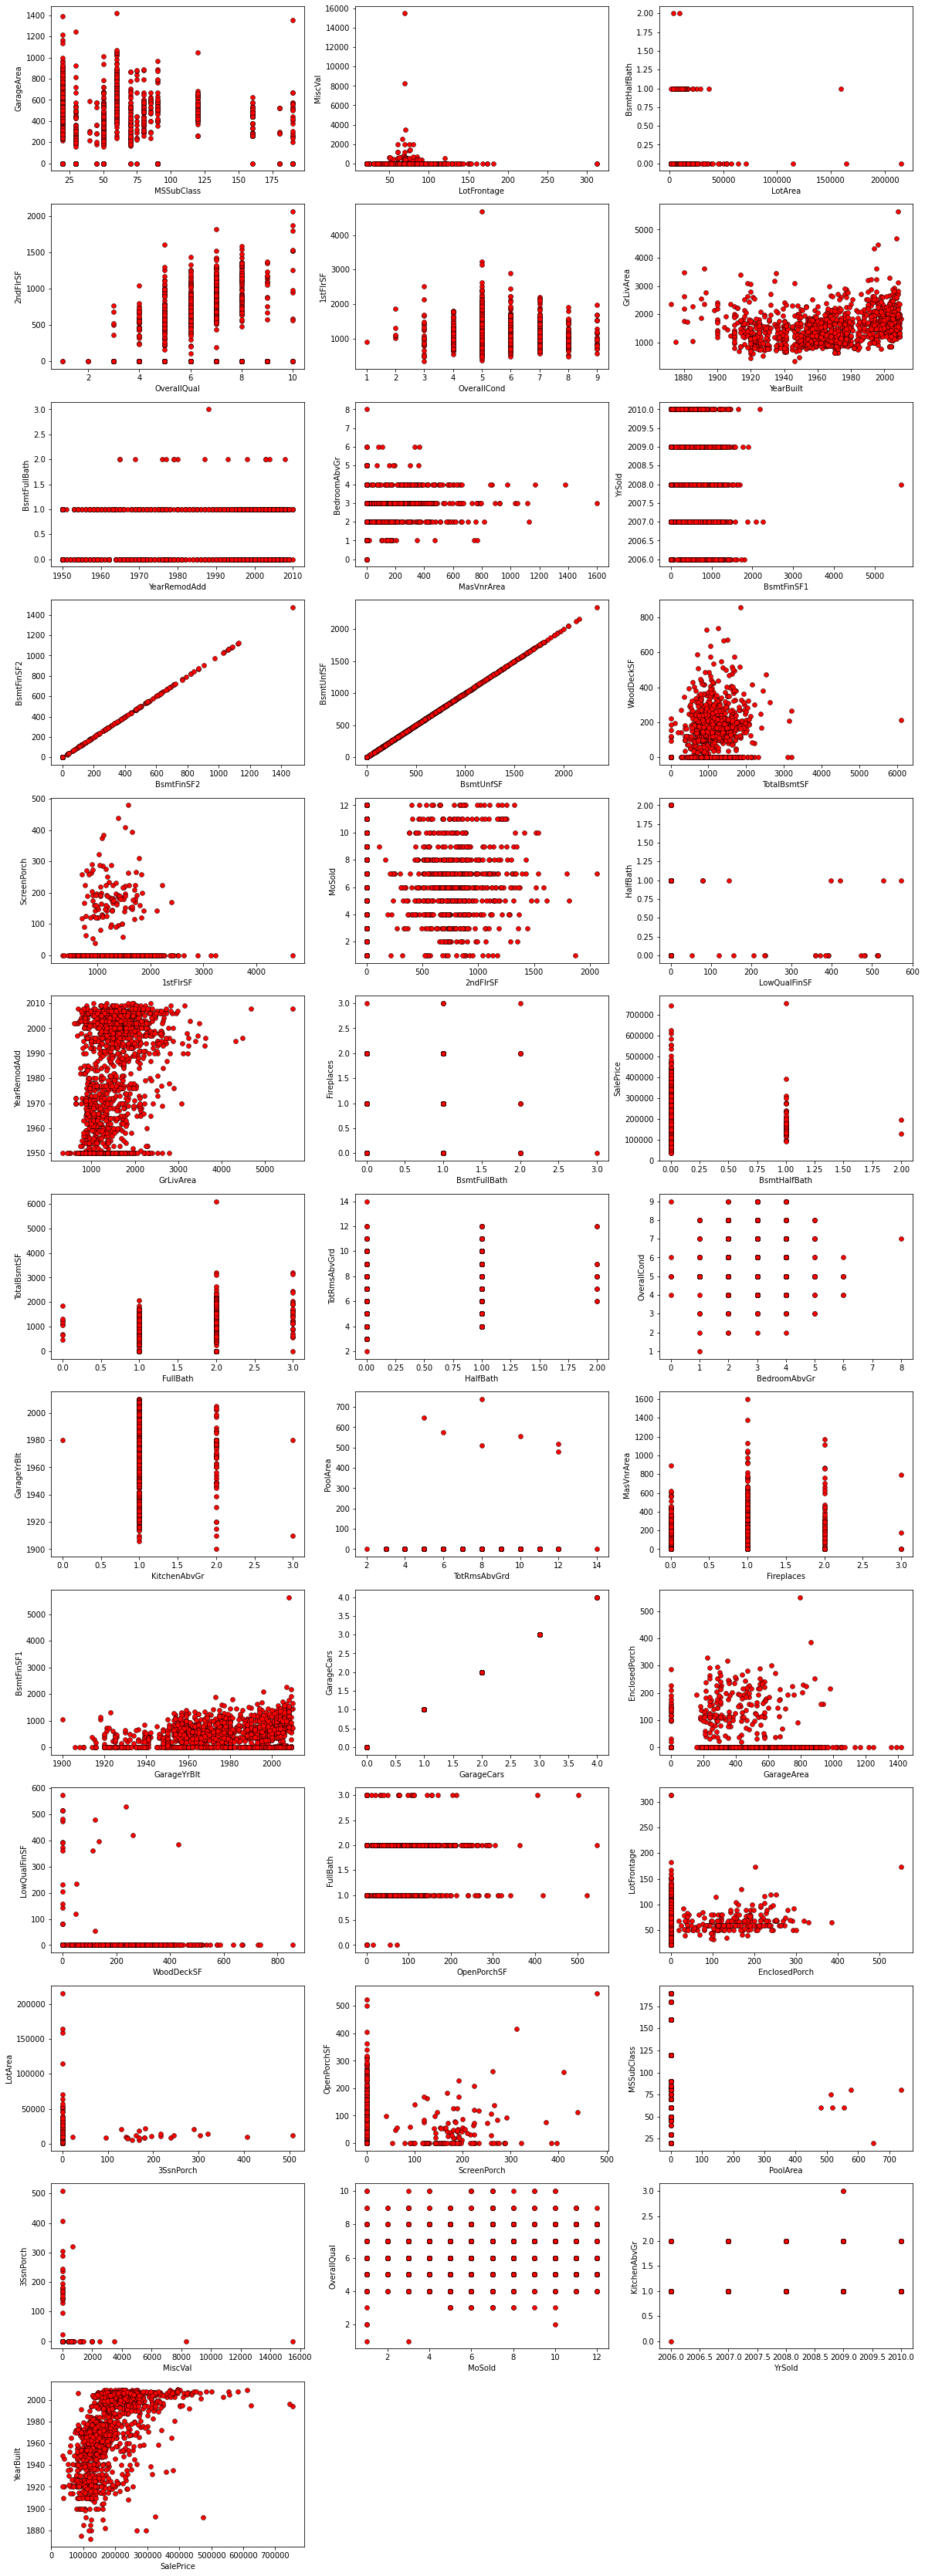

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
L=[15,3,1]
a,b,c=L
fig=plt.figure(figsize=(20,70))
for x,y in zip(num,A):
  plt.subplot(a,b,c)
  sns.scatterplot(data[x],data[y],color="red",edgecolor="k")
  
  c=c+1

In [ ]:
data.describe().T

count           mean  ...        75%       max
MSSubClass     1460.0      56.897260  ...      70.00     190.0
LotFrontage    1460.0      69.863699  ...      79.00     313.0
LotArea        1460.0   10516.828082  ...   11601.50  215245.0
OverallQual    1460.0       6.099315  ...       7.00      10.0
OverallCond    1460.0       5.575342  ...       6.00       9.0
YearBuilt      1460.0    1971.267808  ...    2000.00    2010.0
YearRemodAdd   1460.0    1984.865753  ...    2004.00    2010.0
MasVnrArea     1460.0     103.117123  ...     164.25    1600.0
BsmtFinSF1     1460.0     443.639726  ...     712.25    5644.0
BsmtFinSF2     1460.0      46.549315  ...       0.00    1474.0
BsmtUnfSF      1460.0     567.240411  ...     808.00    2336.0
TotalBsmtSF    1460.0    1057.429452  ...    1298.25    6110.0
1stFlrSF       1460.0    1162.626712  ...    1391.25    4692.0
2ndFlrSF       1460.0     346.992466  ...     728.00    2065.0
LowQualFinSF   1460.0       5.844521  ...       0.00     572.0
GrLivArea      1460.0    1515.463699  ...    1776.75    5642.0
BsmtFullBath   1460.0       0.425342  ...       1.00       3.0
BsmtHalfBath   1460.0       0.057534  ...       0.00       2.0
FullBath       1460.0       1.565068  ...       2.00       3.0
HalfBath       1460.0       0.382877  ...       1.00       2.0
BedroomAbvGr   1460.0       2.866438  ...       3.00       8.0
KitchenAbvGr   1460.0       1.046575  ...       1.00       3.0
TotRmsAbvGrd   1460.0       6.517808  ...       7.00      14.0
Fireplaces     1460.0       0.613014  ...       1.00       3.0
GarageYrBlt    1460.0    1978.589041  ...    2001.00    2010.0
GarageCars     1460.0       1.767123  ...       2.00       4.0
GarageArea     1460.0     472.980137  ...     576.00    1418.0
WoodDeckSF     1460.0      94.244521  ...     168.00     857.0
OpenPorchSF    1460.0      46.660274  ...      68.00     547.0
EnclosedPorch  1460.0      21.954110  ...       0.00     552.0
3SsnPorch      1460.0       3.409589  ...       0.00     508.0
ScreenPorch    1460.0      15.060959  ...       0.00     480.0
PoolArea       1460.0       2.758904  ...       0.00     738.0
MiscVal        1460.0      43.489041  ...       0.00   15500.0
MoSold         1460.0       6.321918  ...       8.00      12.0
YrSold         1460.0    2007.815753  ...    2009.00    2010.0
SalePrice      1460.0  180921.195890  ...  214000.00  755000.0

[37 rows x 8 columns]

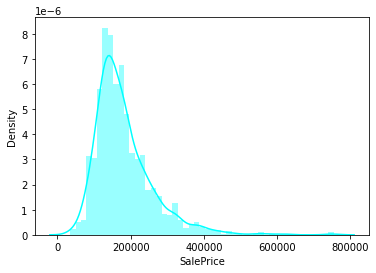

In [ ]:
sns.distplot(data['SalePrice'],color="cyan")

In [ ]:
data.corr()

MSSubClass  LotFrontage   LotArea  ...    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.356718 -0.139781  ... -0.013585 -0.021407  -0.084284
LotFrontage     -0.356718     1.000000  0.304522  ...  0.010451  0.006380   0.334771
LotArea         -0.139781     0.304522  1.000000  ...  0.001205 -0.014261   0.263843
OverallQual      0.032628     0.234812  0.105806  ...  0.070815 -0.027347   0.790982
OverallCond     -0.059316    -0.053281 -0.005636  ... -0.003511  0.043950  -0.077856
YearBuilt        0.027850     0.116685  0.014228  ...  0.012398 -0.013618   0.522897
YearRemodAdd     0.040581     0.083348  0.013788  ...  0.021490  0.035743   0.507101
MasVnrArea       0.023573     0.178469  0.103321  ... -0.006723 -0.008317   0.472614
BsmtFinSF1      -0.069836     0.214367  0.214103  ... -0.015727  0.014359   0.386420
BsmtFinSF2      -0.065649     0.042463  0.111170  ... -0.015211  0.031706  -0.011378
BsmtUnfSF       -0.140759     0.124098 -0.002618  ...  0.034888 -0.041258   0.214479
TotalBsmtSF     -0.238518     0.363472  0.260833  ...  0.013196 -0.014969   0.613581
1stFlrSF        -0.251758     0.413773  0.299475  ...  0.031372 -0.013604   0.605852
2ndFlrSF         0.307886     0.072388  0.050986  ...  0.035164 -0.028700   0.319334
LowQualFinSF     0.046474     0.037469  0.004779  ... -0.022174 -0.028921  -0.025606
GrLivArea        0.074853     0.368007  0.263116  ...  0.050240 -0.036526   0.708624
BsmtFullBath     0.003491     0.090343  0.158155  ... -0.025361  0.067049   0.227122
BsmtHalfBath    -0.002333    -0.006979  0.048046  ...  0.032873 -0.046524  -0.016844
FullBath         0.131608     0.180534  0.126031  ...  0.055872 -0.019669   0.560664
HalfBath         0.177354     0.047222  0.014259  ... -0.009050 -0.010269   0.284108
BedroomAbvGr    -0.023438     0.236840  0.119690  ...  0.046544 -0.036014   0.168213
KitchenAbvGr     0.281721    -0.004905 -0.017784  ...  0.026589  0.031687  -0.135907
TotRmsAbvGrd     0.040380     0.320518  0.190015  ...  0.036907 -0.034516   0.533723
Fireplaces      -0.045569     0.233221  0.271364  ...  0.046357 -0.024096   0.466929
GarageYrBlt      0.081396     0.062996 -0.025865  ...  0.004903 -0.000829   0.466754
GarageCars      -0.040110     0.269539  0.154871  ...  0.040522 -0.039117   0.640409
GarageArea      -0.098672     0.323511  0.180403  ...  0.027974 -0.027378   0.623431
WoodDeckSF      -0.012579     0.075542  0.171698  ...  0.021011  0.022270   0.324413
OpenPorchSF     -0.006100     0.137014  0.084774  ...  0.071255 -0.057619   0.315856
EnclosedPorch   -0.012037     0.010287 -0.018340  ... -0.028887 -0.009916  -0.128578
3SsnPorch       -0.043825     0.061945  0.020423  ...  0.029474  0.018645   0.044584
ScreenPorch     -0.026030     0.037655  0.043160  ...  0.023217  0.010694   0.111447
PoolArea         0.008283     0.180819  0.077672  ... -0.033737 -0.059689   0.092404
MiscVal         -0.007683    -0.000255  0.038068  ... -0.006495  0.004906  -0.021190
MoSold          -0.013585     0.010451  0.001205  ...  1.000000 -0.145721   0.046432
YrSold          -0.021407     0.006380 -0.014261  ... -0.145721  1.000000  -0.028923
SalePrice       -0.084284     0.334771  0.263843  ...  0.046432 -0.028923   1.000000

[37 rows x 37 columns]

**Heatmap**

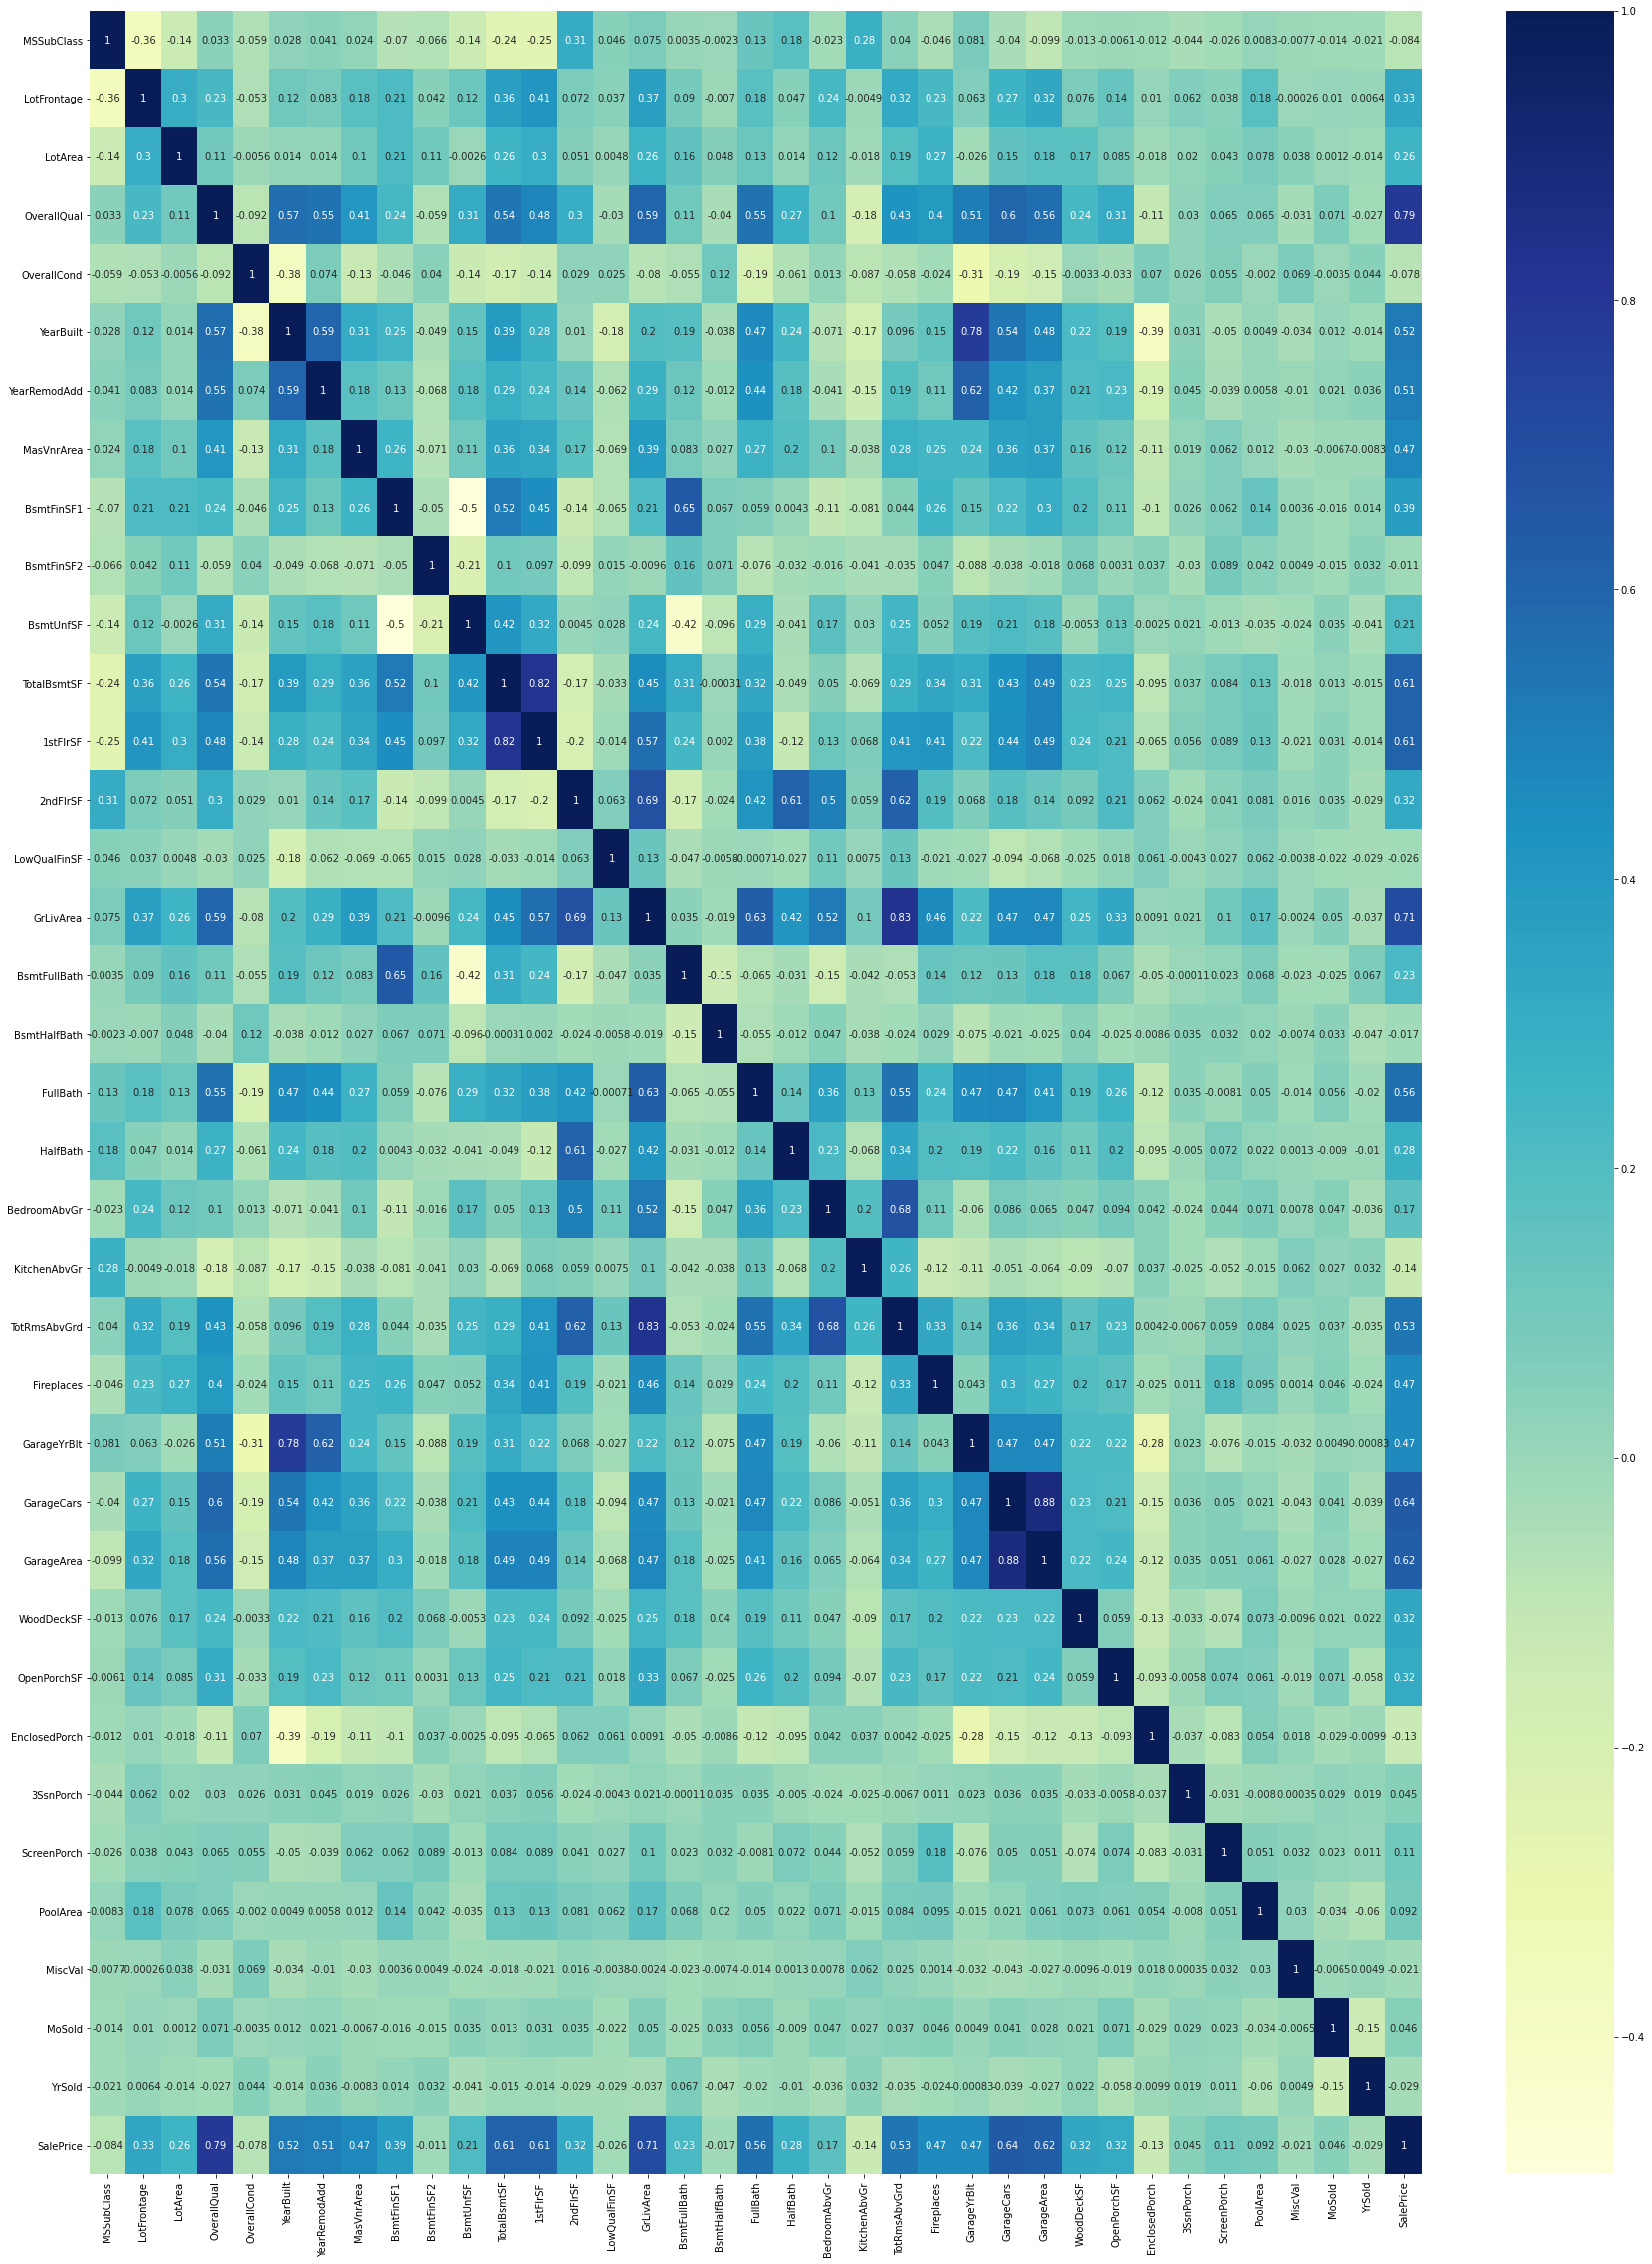

In [ ]:
# plotting Heat map
corr=data.corr()
plt.subplots(figsize=(30,40))
sns.heatmap(corr ,cmap="YlGnBu",annot=True)

In [ ]:
#Trying to find the columns which has more correlation greater than 0.5 with saleprice.
num_data_corr=num.corr()['SalePrice'][:-1]
good_corr_fea_list=num_data_corr[abs(num_data_corr)>0.25].sort_values(ascending=False)
print("There are {} strongly correlated values with Saleprice:\n{}".format(len(good_corr_fea_list),good_corr_fea_list))

There are 20 strongly correlated values with Saleprice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64


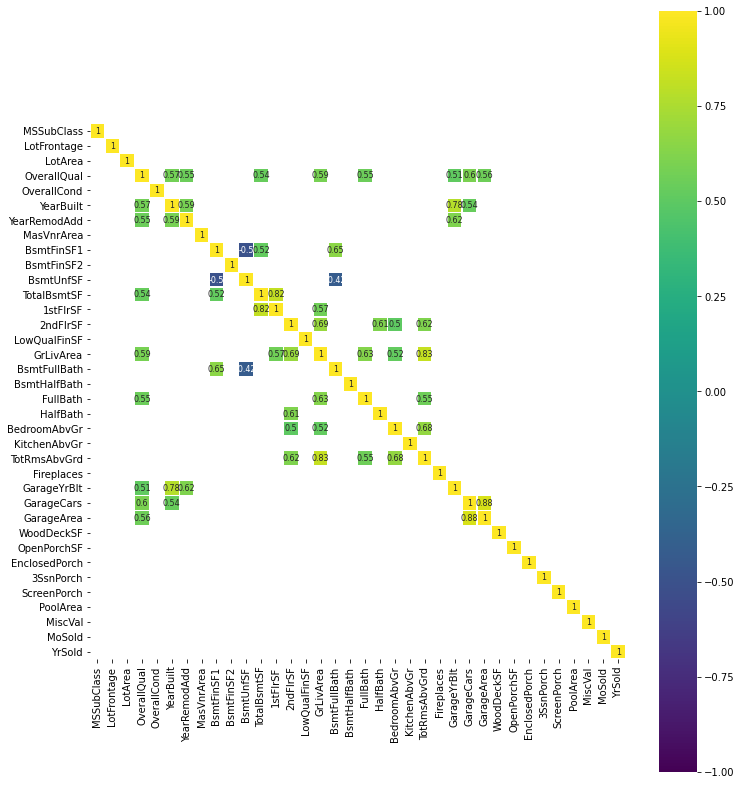

In [ ]:
#Feature to Feature Relationships using heatmap
fea_corr=num.drop('SalePrice',axis=1).corr()
plt.subplots(figsize=(12,14))
sns.heatmap(fea_corr[(fea_corr>=0.5)|(fea_corr<=-0.4)],
              cmap='viridis',vmax=1.0,vmin=-1.0, linewidths= 0.4,
                 annot=True,annot_kws={"size":8},square=True) ;   


**Handling outliers**

In [ ]:
#sns.pairplot(data)

In [ ]:
for i in num:
  Q25=data[i].quantile(0.25)
  Q75=data[i].quantile(0.75)
  IQR=Q75-Q25
  min_limit=Q25-1.5*IQR
  max_limit=Q75+1.5*IQR
  outliers1=[x for x in data[i] if x < min_limit or x > max_limit]
  median=np.median(data[i])
  data[i]=data[i].replace(outliers1,max_limit)

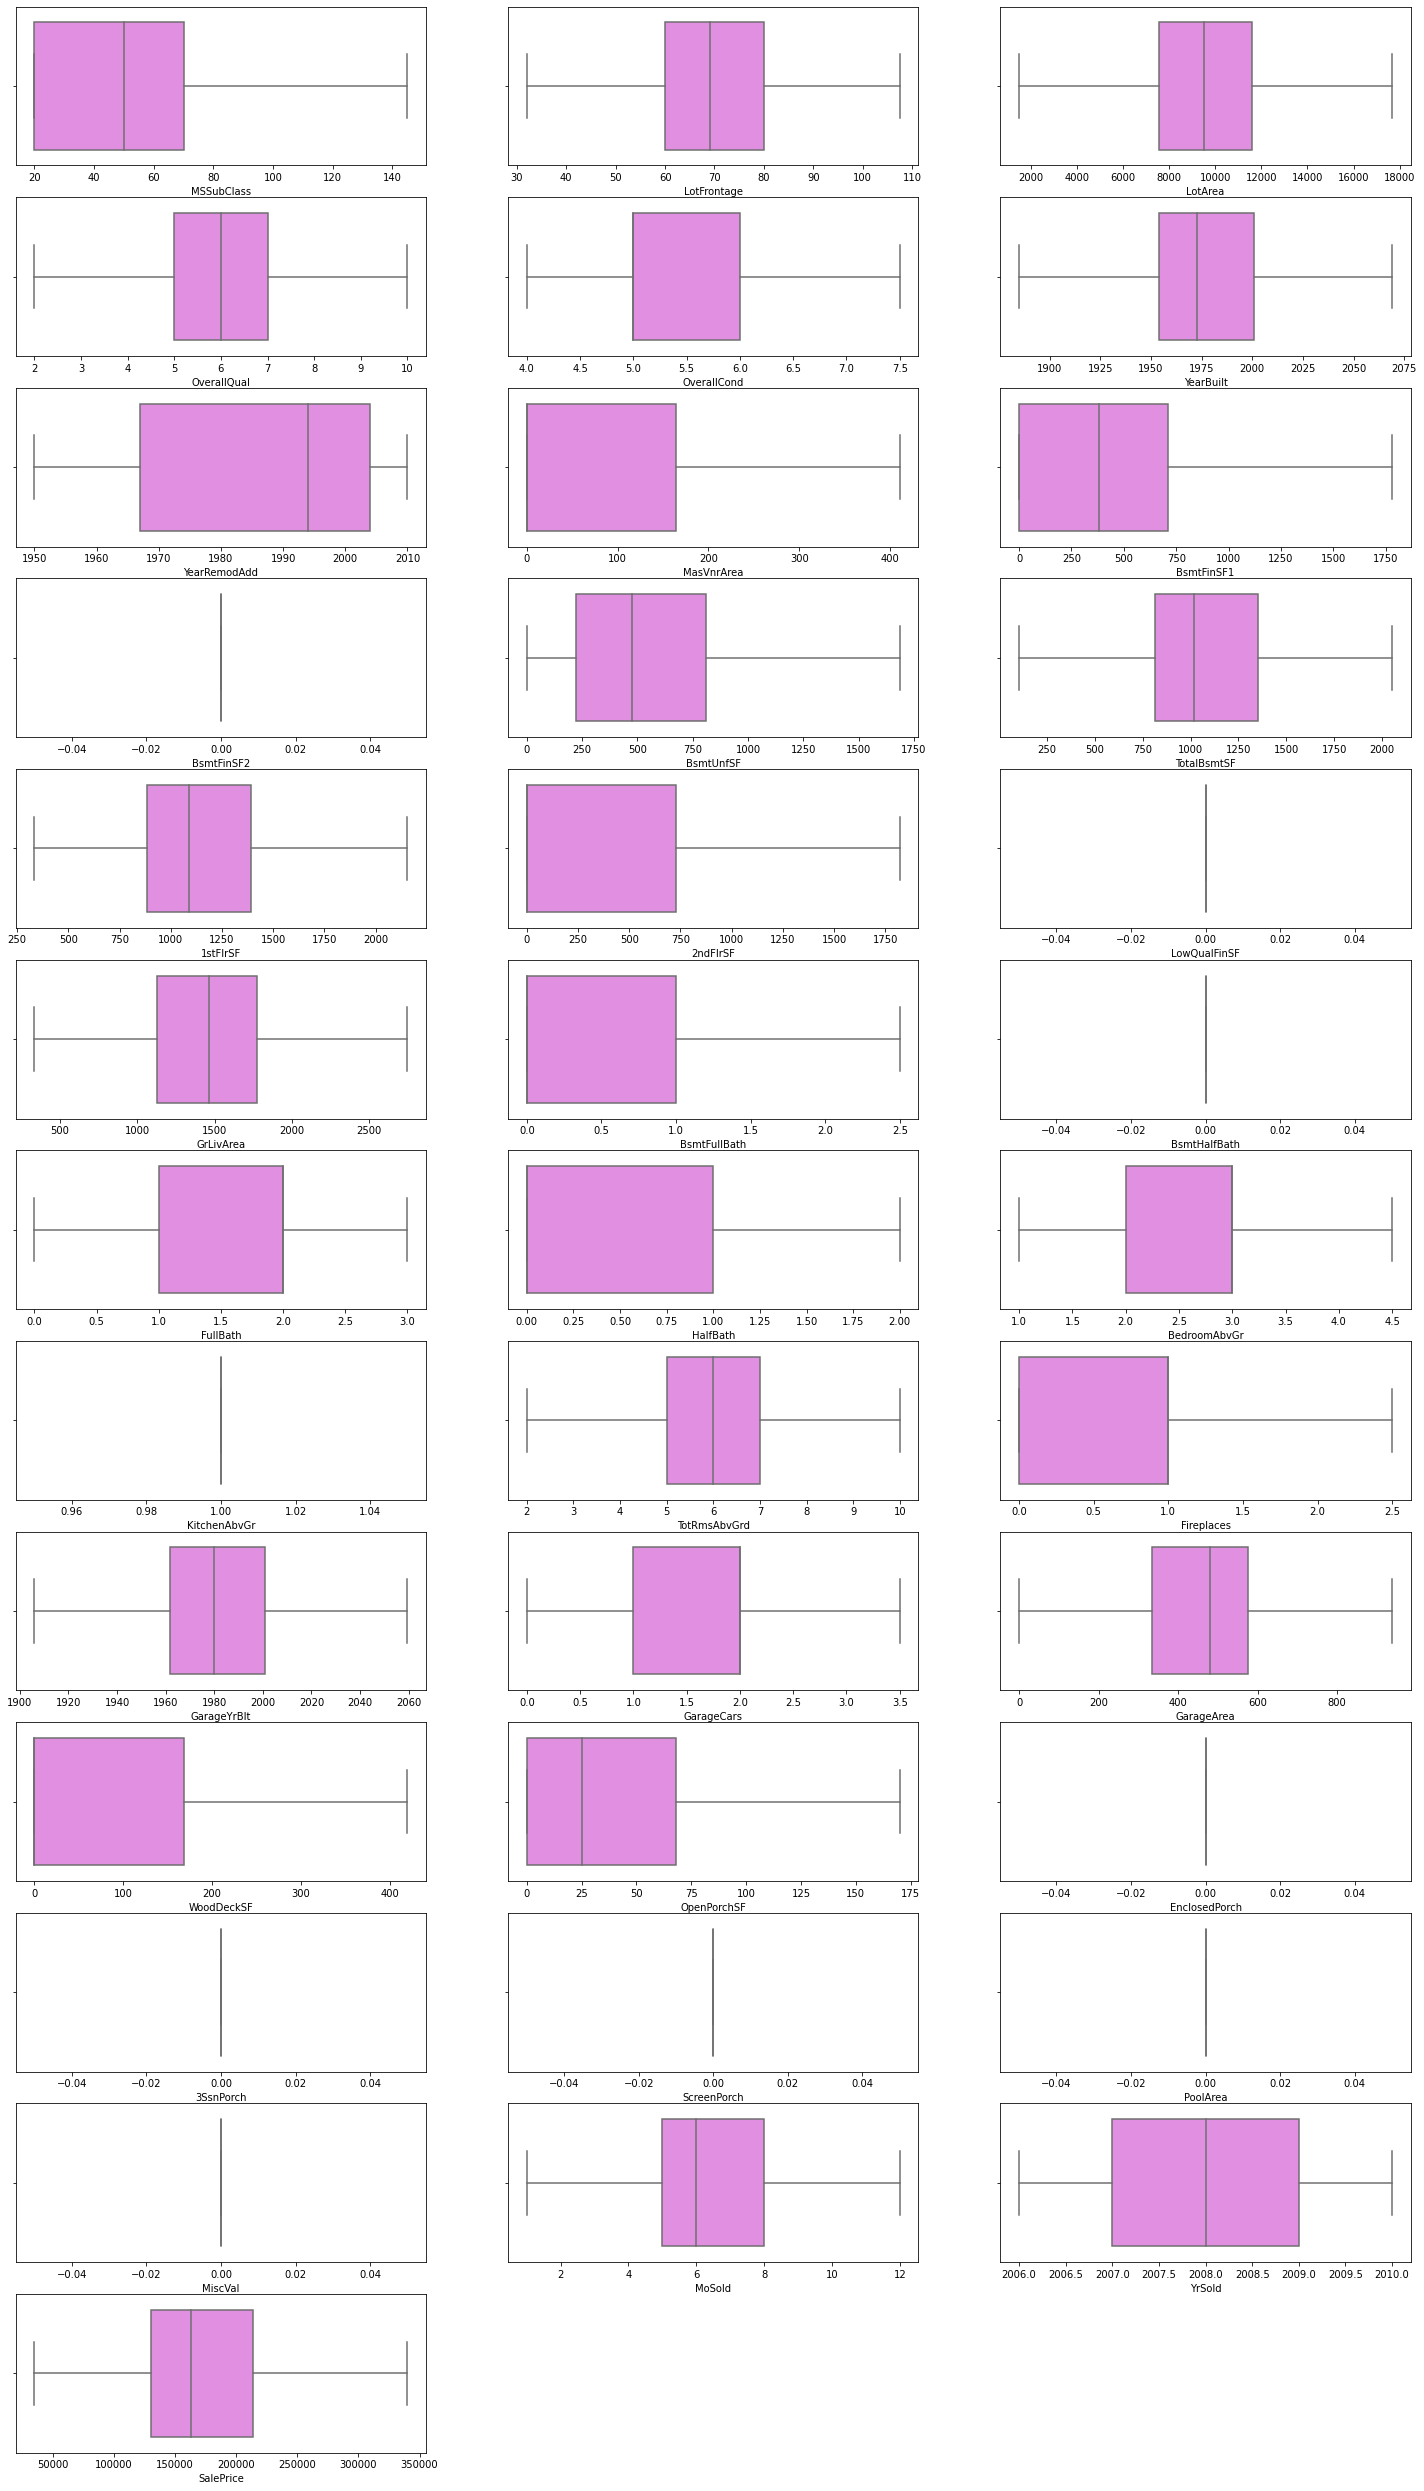

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
L=[13,3,1]
a,b,c=L
fig=plt.figure(figsize=(25,45))
for x in num:
  plt.subplot(a,b,c)
  sns.boxplot(data[x],color="violet")
  
  c=c+1

**Label encoder to encode categorical variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cat_data=data.select_dtypes(include='object')
for x in cat_data:
  data[x]=label.fit_transform(data[x].astype(str))

In [ ]:
data.head()

MSSubClass  MSZoning  LotFrontage  ...  SaleType  SaleCondition  SalePrice
0          60         3         65.0  ...         8              4   208500.0
1          20         3         80.0  ...         8              4   181500.0
2          60         3         68.0  ...         8              4   223500.0
3          70         3         60.0  ...         8              0   140000.0
4          60         3         84.0  ...         8              4   250000.0

[5 rows x 75 columns]

In [ ]:
x=data.iloc[:,:-1]
y=data[["SalePrice"]]

#**Standard scaler is used to scale the data**

In [ ]:
from sklearn.preprocessing  import StandardScaler
model=StandardScaler()
print(model.fit(x))
x_transform=model.transform(x)
print(x_transform)


StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.13106653 -0.04553194 -0.38523908 ...  0.13877749  0.31386709
   0.2085023 ]
 [-0.93573282 -0.04553194  0.49176049 ... -0.61443862  0.31386709
   0.2085023 ]
 [ 0.13106653 -0.04553194 -0.20983917 ...  0.13877749  0.31386709
   0.2085023 ]
 ...
 [ 0.39776637 -0.04553194 -0.32677244 ...  1.64520971  0.31386709
   0.2085023 ]
 [-0.93573282 -0.04553194 -0.20983917 ...  1.64520971  0.31386709
   0.2085023 ]
 [-0.93573282 -0.04553194  0.1994273  ...  0.13877749  0.31386709
   0.2085023 ]]


In [ ]:
scaled_x_fea=pd.DataFrame(x_transform, columns = x.columns)
scaled_x_fea.head()

MSSubClass  MSZoning  LotFrontage  ...    YrSold  SaleType  SaleCondition
0    0.131067 -0.045532    -0.385239  ...  0.138777  0.313867       0.208502
1   -0.935733 -0.045532     0.491760  ... -0.614439  0.313867       0.208502
2    0.131067 -0.045532    -0.209839  ...  0.138777  0.313867       0.208502
3    0.397766 -0.045532    -0.677572  ... -1.367655  0.313867      -3.426284
4    0.131067 -0.045532     0.725627  ...  0.138777  0.313867       0.208502

[5 rows x 74 columns]

#**log transformation applied on target variable**

In [ ]:
log_transform_y=np.log(y)
log_transform_y.head()

SalePrice
0  12.247694
1  12.109011
2  12.317167
3  11.849398
4  12.429216

#**Lasso method is used to select best features**

In [ ]:
#Lasso method to select features
from sklearn .linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_selection=SelectFromModel(Lasso(alpha=0.005,random_state=1))
feature_selection.fit(scaled_x_fea,log_transform_y)
feature_selection.get_support()
selected=scaled_x_fea.columns[(feature_selection.get_support())]
print('Total features:{}'.format(scaled_x_fea.shape[1]))
print('Selected features:{}'.format(len(selected)))
selected
x_sel_features=x[selected]
x_sel_features.shape
new_data=x_sel_features.join(log_transform_y)
new_data.head()

Total features:74
Selected features:39


MSSubClass  MSZoning  LotArea  ...  YrSold  SaleCondition  SalePrice
0          60         3   8450.0  ...    2008              4  12.247694
1          20         3   9600.0  ...    2007              4  12.109011
2          60         3  11250.0  ...    2008              4  12.317167
3          70         3   9550.0  ...    2006              0  11.849398
4          60         3  14260.0  ...    2008              4  12.429216

[5 rows x 40 columns]

In [ ]:
X=new_data.iloc[:,:-1]
Y=new_data["SalePrice"]

[0.00654869 0.01616899 0.01235896 0.00036773 0.00571865 0.0035225
 0.0012364  0.0038243  0.21776663 0.00646118 0.05021184 0.0094897
 0.00446956 0.00388701 0.02255559 0.0031265  0.0036963  0.00841387
 0.01405738 0.00519289 0.03955337 0.00282789 0.02993536 0.14106694
 0.00738847 0.08850344 0.01154652 0.02661336 0.00408369 0.03398567
 0.00905381 0.09251645 0.0688385  0.02182268 0.00360527 0.00406538
 0.00488732 0.00396724 0.00666397]


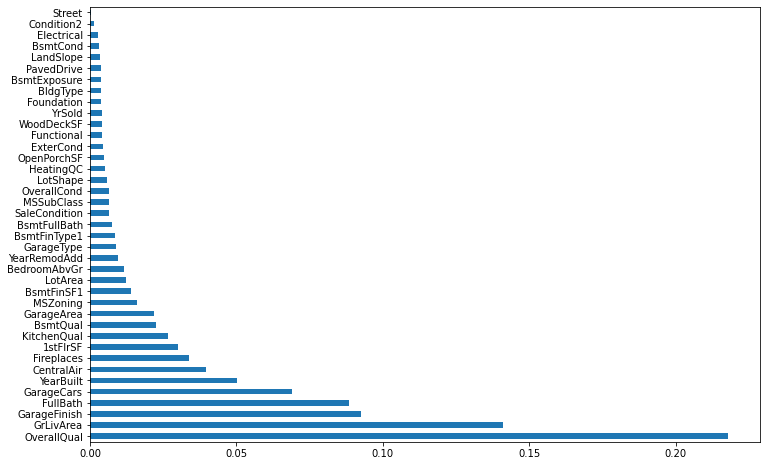

In [ ]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,Y)
print(selection.feature_importances_)
plt.figure(figsize=(12,8))
fea_importances=pd.Series(selection.feature_importances_,index=X.columns)
fea_importances.nlargest(39).plot(kind='barh')
plt.show()

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                    test_size=0.33,random_state=200)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((978, 39), (482, 39), (978,), (482,))

#**Select Regression models**

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
#fit the model and predict values
linear.fit(X_train, y_train)
y_predict = linear.predict(X_test)
#print(y_predict)
#Print the intercept and coefficient of x_features
print('The intercept is {}'.format(linear.intercept_))
pd.DataFrame(linear.coef_,X.columns,columns=['Coefficient'])

The intercept is 14.490676839761882


Coefficient
MSSubClass       -0.000140
MSZoning         -0.019902
LotArea           0.000008
Street            0.138965
LotShape         -0.007202
LandSlope         0.019463
Condition2        0.009448
BldgType          0.002819
OverallQual       0.057560
OverallCond       0.020471
YearBuilt         0.000988
YearRemodAdd      0.002065
ExterCond         0.016209
Foundation       -0.004640
BsmtQual         -0.008530
BsmtCond          0.005425
BsmtExposure     -0.002053
BsmtFinType1     -0.005635
BsmtFinSF1        0.000055
HeatingQC        -0.009433
CentralAir        0.138493
Electrical        0.007890
1stFlrSF          0.000098
GrLivArea         0.000245
BsmtFullBath      0.014316
FullBath          0.003430
BedroomAbvGr      0.009488
KitchenQual      -0.003303
Functional        0.031993
Fireplaces        0.033701
GarageType       -0.000645
GarageFinish     -0.012106
GarageCars        0.043282
GarageArea        0.000029
PavedDrive        0.039626
WoodDeckSF        0.000073
OpenPorchSF       0.000225
YrSold           -0.005136
SaleCondition     0.024612

In [ ]:
#Evaluating the linear model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,y_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,y_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.018253458694463733
MAE:0.09419190750817256
RMSE:0.13510536145713734


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(y_predict)#y=mx+c  
model=sm.OLS(y_test,x_1)#initialised the model
linear=model.fit()
print('r2_score of linear model is {}'.format(linear.rsquared))
print('adjr2_score of linear model is {}'.format(linear.rsquared_adj))

r2_score of linear model is 0.8752756648369322
adjr2_score of linear model is 0.8750158224720092


In [ ]:
#Ridge
from sklearn.linear_model import  Ridge
ridge = Ridge()
#fit the model and predict values
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,ridge_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,ridge_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.01824680483685976
MAE:0.09419704002673274
RMSE:0.13508073451406666


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(ridge_predict)
model=sm.OLS(y_test,x_1)#initialised the model
ridge=model.fit()
print('r2_score of Ridge model is {}'.format(ridge.rsquared))
print('adjr2_score of Ridge model is {}'.format(ridge.rsquared_adj))

r2_score of Ridge model is 0.875318518121176
adjr2_score of Ridge model is 0.8750587650339284


In [ ]:
#LASSO
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_predict = lasso.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,lasso_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,lasso_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.03202199227961372
MAE:0.12781764110852964
RMSE:0.1789468979323579


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(lasso_predict)
model=sm.OLS(y_test,x_1)#initialised the model
lasso=model.fit()
print('r2_score of Lasso model is {}'.format(lasso.rsquared))
print('adjr2_score of Lasso model is {}'.format(lasso.rsquared_adj))

r2_score of Lasso model is 0.7832604477964205
adjr2_score of Lasso model is 0.7828089070626629


In [ ]:
#Kernel Ridge
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge()
kr.fit(X_train, y_train)
kr_predict = kr.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,kr_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,kr_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.018419961878213383
MAE:0.09453335243704904
RMSE:0.13572016017605262


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(kr_predict)
model=sm.OLS(y_test,x_1)#initialised the model
kr=model.fit()
print('r2_score of Kernel ridge model is {}'.format(kr.rsquared))
print('adjr2_score of Kernel Ridge model is {}'.format(kr.rsquared_adj))

r2_score of Kernel ridge model is 0.874077635848624
adjr2_score of Kernel Ridge model is 0.8738152975899752


In [ ]:
#Elastic Net
from sklearn.linear_model import  ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)
en_predict = en.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,en_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,en_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.029670864232336565
MAE:0.1202794421201637
RMSE:0.17225232721892778


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(en_predict)
model=sm.OLS(y_test,x_1)#initialised the model
en=model.fit()
print('r2_score of elastic net model is {}'.format(en.rsquared))
print('adjr2_score elastic net model is {}'.format(en.rsquared_adj))

r2_score of elastic net model is 0.7983323387355713
adjr2_score elastic net model is 0.7979121977746038


In [ ]:
#Support Vector machine
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,svm_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,svm_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.04534144714119738
MAE:0.15741395026377214
RMSE:0.2129353121048676


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(svm_predict)
model=sm.OLS(y_test,x_1)#initialised the model
svm=model.fit()
print('r2_score of svm model is {}'.format(svm.rsquared))
print('adjr2_score of svm model is {}'.format(svm.rsquared_adj))

r2_score of svm model is 0.7043515571739131
adjr2_score of svm model is 0.7037356229180254


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,knn_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,knn_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.051847271334837824
MAE:0.16877244952884043
RMSE:0.22769995901369378


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(knn_predict)
model=sm.OLS(y_test,x_1)#initialised the model
knn=model.fit()
print('r2_score of KNN model is {}'.format(knn.rsquared))
print('adjr2_score of KNN model is {}'.format(knn.rsquared_adj))

r2_score of KNN model is 0.6475904145043785
adjr2_score of KNN model is 0.6468562278679293


In [ ]:
#DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,dt_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,dt_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.038147600001420645
MAE:0.13941438385323118
RMSE:0.19531410599703403


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(dt_predict)
model=sm.OLS(y_test,x_1)#initialised the model
dt=model.fit()
print('r2_score of Decision tree model  is {}'.format(dt.rsquared))
print('adjr2_score of Decision tree model is  {}'.format(dt.rsquared_adj))

r2_score of Decision tree model  is 0.7589017325359502
adjr2_score of Decision tree model is  0.7583994444787334


In [ ]:
#XGB
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,xgb_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,xgb_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

[07:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE:0.016315172048160416
MAE:0.09083273161573217
RMSE:0.12773085785416308


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(xgb_predict)
model=sm.OLS(y_test,x_1)#initialised the model
xgb=model.fit()
print('r2_score of XGB model is {}'.format(xgb.rsquared))
print('adjr2_score XGB model is {}'.format(xgb.rsquared_adj))

r2_score of XGB model is 0.8889898437804236
adjr2_score XGB model is 0.8887585726216327


In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,rf_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,rf_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))


MSE:0.018159042553232845
MAE:0.09094664889174309
RMSE:0.13475549173682252


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(rf_predict)
model=sm.OLS(y_test,x_1)#initialised the model
rf=model.fit()
print('r2_score of Random forest model  is {}'.format(rf.rsquared))
print('adjr2_score of Random forest model is {}'.format(rf.rsquared_adj))

r2_score of Random forest model  is 0.8784862718675479
adjr2_score of Random forest model is 0.8782331182672719


In [ ]:
#GradientBoostingRegressor
from sklearn.ensemble import  GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_predict = gb.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,gb_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,gb_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.01555668666629792
MAE:0.08928899167105724
RMSE:0.12472644734096261


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(gb_predict)
model=sm.OLS(y_test,x_1)#initialised the model
gb=model.fit()
print('r2_score of GradientBoostingRegressor is {}'.format(gb.rsquared))
print('adjr2_score of GradientBoostingRegressor is {}'.format(gb.rsquared_adj))

r2_score of GradientBoostingRegressor is 0.8940397770657347
adjr2_score of GradientBoostingRegressor is 0.8938190266012883


In [ ]:
#AdaBoostRegressor
from sklearn.ensemble import  AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)
ab_predict = ab.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,ab_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,ab_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.03349515978207116
MAE:0.1433559929015492
RMSE:0.18301682923182547


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(ab_predict)
model=sm.OLS(y_test,x_1)#initialised the model
ab=model.fit()
print('r2_score of AdaBoostRegressor is {}'.format(ab.rsquared))
print('adjr2_score of AdaBoostRegressor is {}'.format(ab.rsquared_adj))

r2_score of AdaBoostRegressor is 0.7857492296234652
adjr2_score of AdaBoostRegressor is 0.7853028738518474


In [ ]:
# LGBMRegressor
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
lgb_predict = lgb.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,lgb_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,lgb_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.01575702534463766
MAE:0.0863775364929647
RMSE:0.12552699050259136


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(lgb_predict)
model=sm.OLS(y_test,x_1)#initialised the model
lgb=model.fit()
print('r2_score of  LGBMRegressor is {}'.format(lgb.rsquared))
print('adjr2_score of  LGBMRegressor is {}'.format(lgb.rsquared_adj))

r2_score of  LGBMRegressor is 0.891858639930141
adjr2_score of  LGBMRegressor is 0.8916333454299955


In [ ]:
#ExtraTreesRegressor
from sklearn.ensemble import  ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_train, y_train)
et_predict = et.predict(X_test)
#y_predict
#Evaluating the model using MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE=mean_squared_error(y_test,et_predict)
print('MSE:{}'.format(MSE))
MAE=mean_absolute_error(y_test,et_predict)
print('MAE:{}'.format(MAE))
RMSE=np.sqrt(MSE)
print('RMSE:{}'.format(RMSE))

MSE:0.016710415077395638
MAE:0.08950213653740483
RMSE:0.12926877069654386


In [ ]:
import statsmodels.api as sm
x_1=sm.add_constant(et_predict)
model=sm.OLS(y_test,x_1)#initialised the model
et=model.fit()
print('r2_score of ExtraTreesRegressor is {}'.format(et.rsquared))
print('adjr2_score of ExtraTreesRegressor is {}'.format(et.rsquared_adj))

r2_score of ExtraTreesRegressor is 0.8873160360399774
adjr2_score of ExtraTreesRegressor is 0.8870812777817274


In [ ]:
models=[linear,ridge,lasso,kr,en,svm,knn,rf,dt,gb,xgb,ab,et,lgb]
A=['linear','ridge','lasso','kr','en','svm','knn','rf','dt','gb','xgb','ab','et','lgb']
for x,y in zip(models,A):
  print('r2_score of {} model is {}'.format(y,x.rsquared))

r2_score of linear model is 0.8752756648369322
r2_score of ridge model is 0.875318518121176
r2_score of lasso model is 0.7832604477964205
r2_score of kr model is 0.874077635848624
r2_score of en model is 0.7983323387355713
r2_score of svm model is 0.7043515571739131
r2_score of knn model is 0.6475904145043785
r2_score of rf model is 0.8784862718675479
r2_score of dt model is 0.7589017325359502
r2_score of gb model is 0.8940397770657347
r2_score of xgb model is 0.8889898437804236
r2_score of ab model is 0.7857492296234652
r2_score of et model is 0.8873160360399774
r2_score of lgb model is 0.891858639930141


In [ ]:
for x,y in zip(models,A):
  z=np.round(x.rsquared,4)
  print(y,z)

linear 0.8753
ridge 0.8753
lasso 0.7833
kr 0.8741
en 0.7983
svm 0.7044
knn 0.6476
rf 0.8785
dt 0.7589
gb 0.894
xgb 0.889
ab 0.7857
et 0.8873
lgb 0.8919


#**optimized scores of all possible models**

In [ ]:
optimized_scores = pd.DataFrame({'Optimized Scores':np.round([linear.rsquared, ridge.rsquared,svm.rsquared,knn.rsquared,rf.rsquared,dt.rsquared,gb.rsquared,xgb.rsquared,et.rsquared,lgb.rsquared,ab.rsquared], 4)})
optimized_scores.index = ['Linear','ridge','svm','knn','rf','dt','gb','xgb','et','lgb','ab']
optimized_scores.sort_values(by = 'Optimized Scores')

Optimized Scores
knn               0.6476
svm               0.7044
dt                0.7589
ab                0.7857
Linear            0.8753
ridge             0.8753
rf                0.8785
et                0.8873
xgb               0.8890
lgb               0.8919
gb                0.8940